In [1]:
!pip install numpy pandas matplotlib seaborn scikit-optimize xgboost plotly imblearn --upgrade --quiet

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Reading the dataset

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Santhosh-03/Datasets/main/Employee%20Attrition%20Prediction/training_data.csv', sep = ';')
test_df = pd.read_csv('https://raw.githubusercontent.com/Santhosh-03/Datasets/main/Employee%20Attrition%20Prediction/testing_data.csv')

In [4]:
train_df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,25,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,Female,62,3,2,Manufacturing Director,3,Married,4898,7505,0,Y,No,12,3,4,80,2,5,3,3,4,2,1,2,0
1,44,Travel_Rarely,1376,Human Resources,1,2,Medical,1,1098,2,Male,91,2,3,Human Resources,1,Married,10482,2326,9,Y,No,14,3,4,80,1,24,1,3,20,6,3,6,1


### Data Description

* Id - an anonymous id given to an Employee

* Age - Age of an Employee

* Attrition - Did the Employee leave the company, 0-No, 1-Yes

* BusinessTravel - Travlling frequency of an Employee

* Department - Work Department

* DistanceFromHome - Distance of office from home

* EducationField - Field of Education

* EmployeeNumber - Number of Employees in the division of a given Employee

* EnvironmentSatisfaction - Work Environment Satisfaction

* Gender - Gender of Employee

* MartialStatus - Martial Status of an employee

* MonthlyIncome - Monthly Income of Employee in USD

* NumCompaniesWorked - Number of Companies in which Employee has worked before joining this Company

* OverTime - Does The person work overtime

* PercentSalaryHike - Average annual salary hike in percentages

* StockOptionLevel - Company stocks given to an Employee

* TotalWorkingYears - Total working experience of an employee

* TrainingTimesLastYear - No. of trainings an employee went through last year

* YearsAtCompany - Number of years worked at this company

* YearsInCurrentRole - Number of years in current role

* YearsSinceLastPromotion - Number of years since last promotion

* YearsWithCurrManager - Number of years with the current manager

* Education

    1 - Below College

    2 - College

    3 - Bachelor

    4 - Master

    5 - Doctor

* EnvironmentSatisfaction

    1 - Low

    2 - Medium

    3 - High

    4 - Very High

* JobInvolvement

    1 - Low

    2 - Medium

    3 - High

    4 - Very High

* JobSatisfaction

    1 - Low

    2 - Medium

    3 - High

    4 - Very High

* PerformanceRating

    1 - Low

    2 - Good

    3 - Excellent

    4 - Outstanding

* Behaviour

    1 - Good

    2 - Bad

    3 - Not Rated

* CommunicationSkill

    1 - Bad

    2 - Average

    3 - Good

    4 - Better

    5 - Best

* StockOptionLevel

    0 - No stocks

    1 - Less Stocks

    2 - Moderate Stocks

    3 - A lot of Stocks


In [5]:
print('The train data has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))
print('The test data has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

The train data has 1176 rows and 35 columns
The test data has 294 rows and 34 columns


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeCount             1176 non-null   int64 
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  HourlyRate                1176 non-null   int64 
 12  JobInvolvement            1176 non-null   int64 
 13  JobLevel                  1176 non-null   int64 
 14  JobRole                 

Here we can see that there are null values in the dataset and columns are of type integer and object.

## Exploratory Data Analysis

In [7]:
train_df.columns = train_df.columns.str.lower() # converting the names of the columns to lower case

In [8]:
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True, font_scale = 0.7) # setting the style gloabally

### Age 

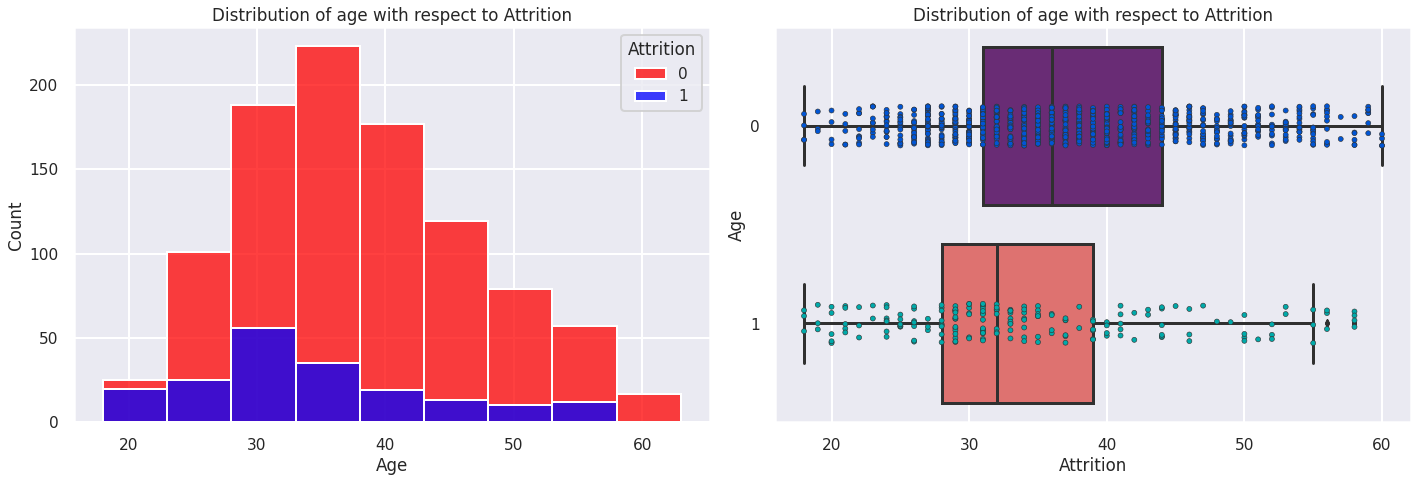

In [9]:
plt.figure(figsize = (20, 7))

plt.subplot(1,2,1)
sns.histplot(train_df[train_df['attrition'] == 0]['age'], color = 'red', binwidth = 5) # histogram for not having an attrition
sns.histplot(train_df[train_df['attrition'] == 1]['age'], color = 'blue', binwidth = 5) # histogram for having an attrition
plt.title('Distribution of age with respect to Attrition')
plt.xlabel('Age')
plt.legend(train_df['attrition'].unique(), title = 'Attrition')


plt.subplot(1,2,2)
sns.boxplot(x = train_df['age'], y = train_df['attrition'], palette = 'magma', orient = 'h') # boxplot for the attrition and age
sns.stripplot(x = train_df['age'], y = train_df['attrition'], orient = 'h', linewidth = 0.6, palette='winter')
plt.title('Distribution of age with respect to Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')

plt.tight_layout()

In [10]:
age_attrition = train_df.groupby(['age','attrition']).apply(lambda x:x['age'].count()).reset_index(name = 'counts')
age_attrition

,age,attrition,counts
0,18,0,4
1,18,1,3
2,19,0,3
3,19,1,3
4,20,0,4
...,...,...,...
77,57,0,2
78,58,0,6
79,58,1,4
80,59,0,7


In [11]:
px.line(age_attrition, x='age', y='counts', color='attrition', 
       title = 'Attrition count with respect to Age')

In [12]:
train_df.groupby('attrition')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
attrition,,,,,,,,
0,986.0,37.561866,8.925224,18.0,31.0,36.0,44.0,60.0
1,190.0,33.863158,9.678548,18.0,28.0,32.0,39.0,58.0


__INSIGHTS:__

* Here we  can see that there are many number of attritions around the age of 25 to 40. The reason could be that employees try get a stable job while they are still young.
* 75% of the employees make an attrition at age of 39 or below.

### Business Travel and Department

In [13]:
train_df['department'].unique()

array(['Research & Development', 'Human Resources', 'Sales'], dtype=object)

In [14]:
train_df['businesstravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

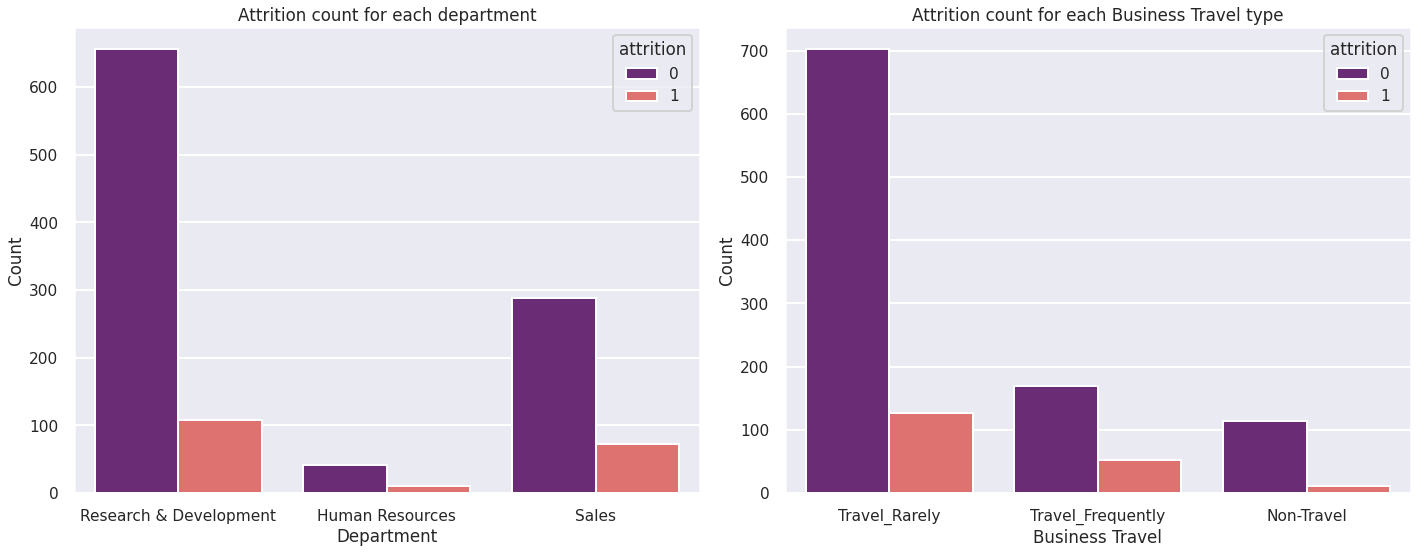

In [15]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sns.countplot(train_df['department'], hue = train_df['attrition'], palette = 'magma')
plt.title('Attrition count for each department')
plt.xlabel('Department')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(train_df['businesstravel'], hue = train_df['attrition'], palette = 'magma')
plt.title('Attrition count for each Business Travel type')
plt.xlabel('Business Travel')
plt.ylabel('Count')

plt.tight_layout()

__INSIGHTS:__

* Here we can see that the R&D department has the highest number of attrition rate compared to HR and Sales department.
* Also the employees who travel rarely have a higher attrition rate compared to the employees who travel frequently and who don't travel at all.

### Daily Rate and Distance From Home

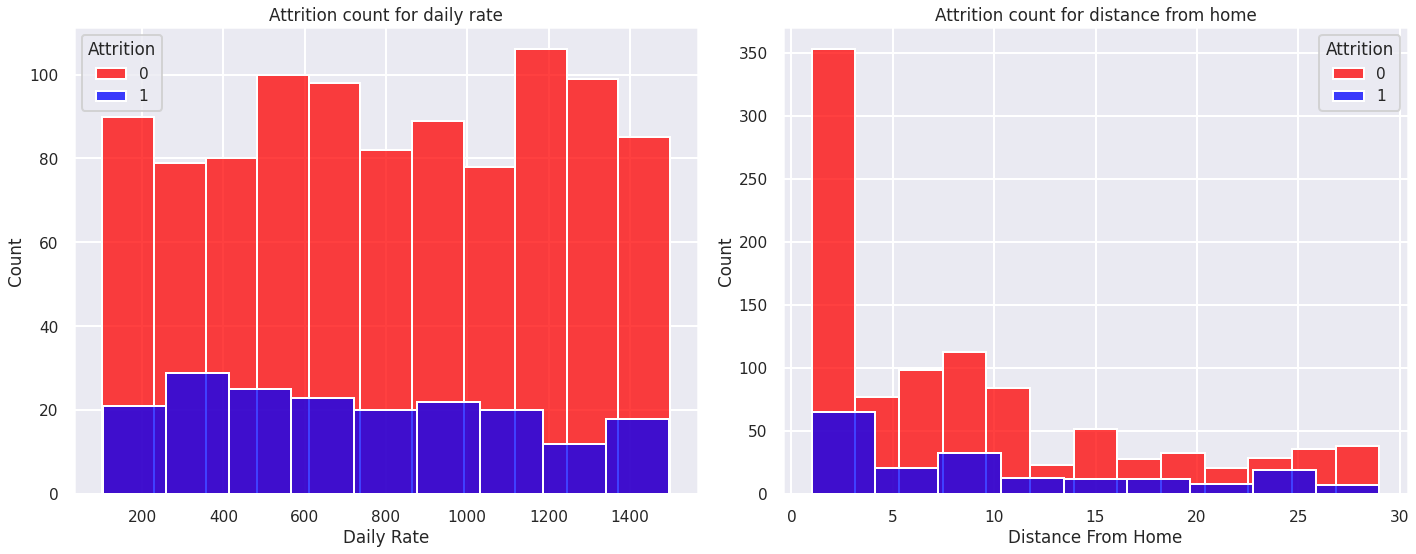

In [16]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sns.histplot(train_df[train_df['attrition'] == 0]['dailyrate'], color = 'red')
sns.histplot(train_df[train_df['attrition'] == 1]['dailyrate'], color = 'blue')
plt.title('Attrition count for daily rate')
plt.xlabel('Daily Rate')
plt.ylabel('Count')
plt.legend(train_df['attrition'].unique(), title = 'Attrition')

plt.subplot(1,2,2)
sns.histplot(train_df[train_df['attrition'] == 0]['distancefromhome'], color = 'red')
sns.histplot(train_df[train_df['attrition'] == 1]['distancefromhome'], color = 'blue')
plt.title('Attrition count for distance from home')
plt.xlabel('Distance From Home')
plt.ylabel('Count')
plt.legend(train_df['attrition'].unique(), title = 'Attrition')

plt.tight_layout()

__INSIGHTS__:

* Here we can see that employees who have a daily rate between 200 and 800 tend to have a higher attrition rate.
* Also people who travel less that 5 km have a high attrition rate.

### Education and Education Field

In [17]:
train_df['education'].unique()

array([3, 2, 4, 1, 5])

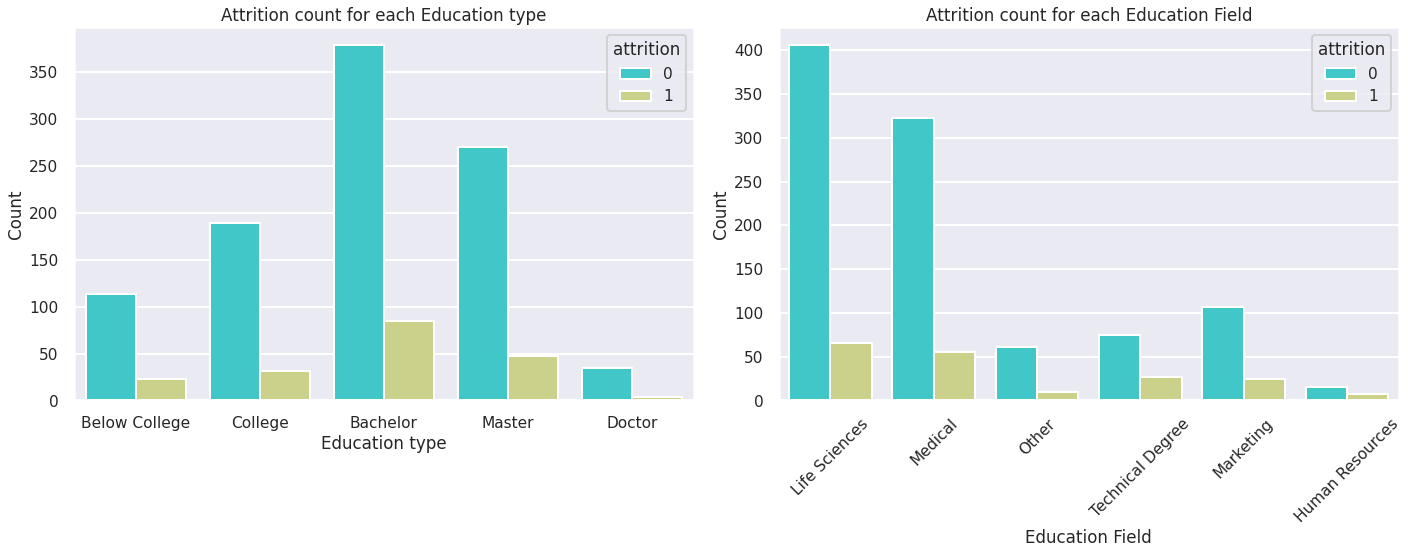

In [18]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sns.countplot(train_df['education'], hue = train_df['attrition'], palette = 'rainbow')
plt.title('Attrition count for each Education type')
plt.xticks(range(5), ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.xlabel('Education type')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(train_df['educationfield'], hue = train_df['attrition'], palette = 'rainbow')
_ = plt.xticks(rotation = 45)
plt.title('Attrition count for each Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')

plt.tight_layout()

__INSIGHTS__:

* Here we can see that employees having a Bachelor's degree have a higher attrition rate followed by Master's degree.
* Also employees in the field of life science and medical are having a higher attrition rate.

### Environment and Relationship satisfaction

In [19]:
train_df['environmentsatisfaction'].unique()

array([1, 2, 4, 3])

In [20]:
train_df['relationshipsatisfaction'].unique()

array([4, 3, 1, 2])

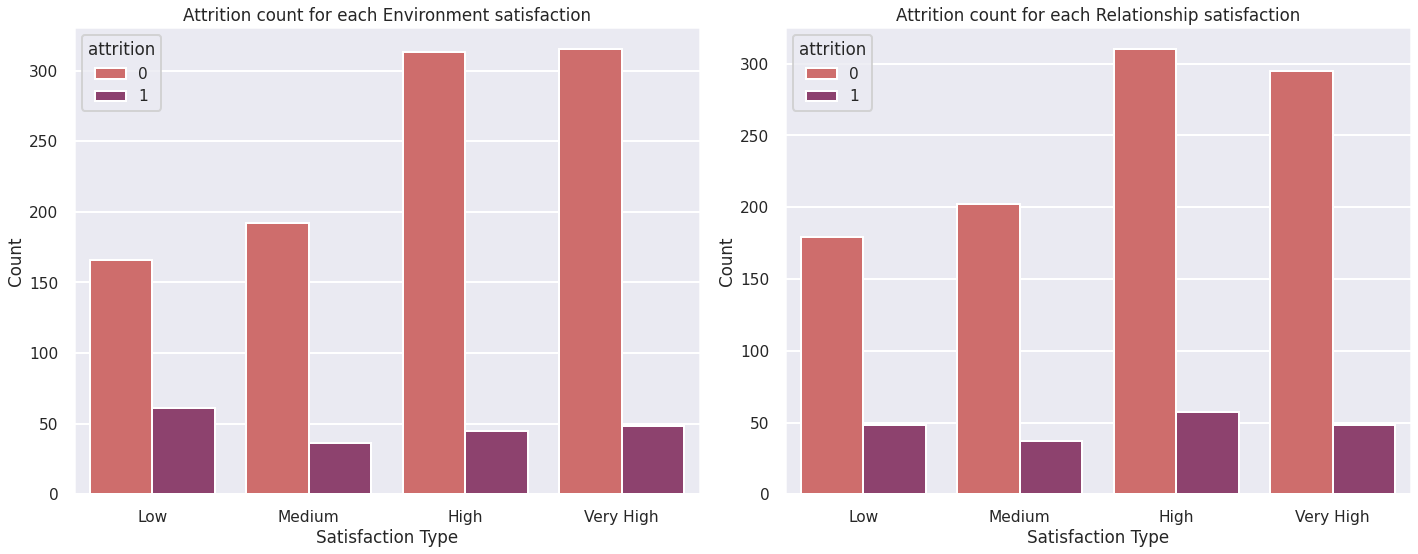

In [21]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sns.countplot(train_df['environmentsatisfaction'], hue = train_df['attrition'], palette = 'flare')
plt.title('Attrition count for each Environment satisfaction')
plt.xticks(range(4), ['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Satisfaction Type')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(train_df['relationshipsatisfaction'], hue = train_df['attrition'], palette = 'flare')
plt.xticks(range(4), ['Low', 'Medium', 'High', 'Very High'])
plt.title('Attrition count for each Relationship satisfaction')
plt.xlabel('Satisfaction Type')
plt.ylabel('Count')

plt.tight_layout()

__INSIGHTS__

* Here we can see that employees having very low environment satisfaction are having a higher attrition rate.
* Here we can see that employees having high relationship satisfaction are having a higher attrition rate.

### Year At Company, Years in Current Role

In [22]:
years_at_company_att = train_df.groupby(
                    ['yearsatcompany', 'attrition']).apply(lambda x:x['yearsatcompany'].count()).reset_index(
                                                                                        name = 'counts')
years_at_company_att.head()

,yearsatcompany,attrition,counts
0,0,0,23
1,0,1,11
2,1,0,92
3,1,1,49
4,2,0,76


In [23]:
px.line(years_at_company_att, x = 'yearsatcompany', y = 'counts',
        color='attrition', title = 'Years at company Vs Attrition')

__INSIGHTS:__

* Here we can see that about 50 employees have left the company after one year of joining.

In [24]:
years_at_curr_role_att = train_df.groupby(
                    ['yearsincurrentrole', 'attrition']).apply(lambda x:x['yearsincurrentrole'].count()).reset_index(
                                                                                        name = 'counts')
years_at_curr_role_att.head()

,yearsincurrentrole,attrition,counts
0,0,0,140
1,0,1,60
2,1,0,33
3,1,1,7
4,2,0,237


In [25]:
px.line(years_at_curr_role_att, x = 'yearsincurrentrole', y = 'counts',
        color='attrition', title = 'Years in current role Vs Attrition')

__INSIGHTS:__

* Here we can see that employees are looking for a change in initial stages of their career by making changes in the first 2 to 3 years.

### Years since last promotion, Years with current manager

In [26]:
years_since_promotion_att = train_df.groupby(
                    ['yearssincelastpromotion', 'attrition']).apply(lambda x:x['yearssincelastpromotion'].count()).reset_index(
                                                                                        name = 'counts')
years_since_promotion_att.head()

,yearssincelastpromotion,attrition,counts
0,0,0,384
1,0,1,87
2,1,0,231
3,1,1,40
4,2,0,103


In [27]:
px.line(years_since_promotion_att, x = 'yearssincelastpromotion', y = 'counts',
        color='attrition', title = 'Years since last promotion Vs Attrition')

In [28]:
years_with_curr_manager_att = train_df.groupby(
                    ['yearswithcurrmanager', 'attrition']).apply(lambda x:x['yearswithcurrmanager'].count()).reset_index(
                                                                                        name = 'counts')
years_with_curr_manager_att.head()

,yearswithcurrmanager,attrition,counts
0,0,0,142
1,0,1,70
2,1,0,51
3,1,1,6
4,2,0,237


In [29]:
px.line(years_with_curr_manager_att, x = 'yearswithcurrmanager', y = 'counts',
        color='attrition', title = 'Years with current manager Vs Attrition')

__INSIGHTS__:

* Here we can see that employees within 2 years have made an attrition having worked under the same manager.
* There is also a spike at 7th year which may be due to employee seeking after change after working long period under the manager.

### Number of companies worked and Percent salary hike 

In [30]:
num_companies_worked_att = train_df.groupby(
                    ['numcompaniesworked', 'attrition']).apply(lambda x:x['numcompaniesworked'].count()).reset_index(
                                                                                        name = 'counts')
num_companies_worked_att.head()

,numcompaniesworked,attrition,counts
0,0,0,135
1,0,1,17
2,1,0,345
3,1,1,76
4,2,0,112


In [31]:
px.line(num_companies_worked_att, x = 'numcompaniesworked', y = 'counts',
        color='attrition', title = 'Number of companies worked Vs Attrition')

__INSIGHTS:__

* Here we can see that employees who are working at their first company have a higher attrition count.
* As the number increases we can see that there is a decline in the count employees may found it as a stable job.

In [32]:
salary_hike_att = train_df.groupby(
                    ['percentsalaryhike', 'attrition']).apply(lambda x:x['percentsalaryhike'].count()).reset_index(
                                                                                        name = 'counts')
salary_hike_att.head()

,percentsalaryhike,attrition,counts
0,11,0,134
1,11,1,32
2,12,0,127
3,12,1,28
4,13,0,145


In [33]:
px.line(salary_hike_att, x = 'percentsalaryhike', y = 'counts',
        color='attrition', title = 'Salary hike Vs Attrition')

__INSIGHTS__:

* Here we can see that as the percentage hike increases the number of attrition count decreases.
* It shows that the employees are happy with the hike provided by their employer.

## Preparing the data for training

We'll perform the following steps to prepare the dataset for training:

* Create a train/test/validation split.
* Identify input and target columns.
* Identify numeric and categorical columns.
* Impute (fill) missing numeric values.
* Scale numeric values.
* Encode categorical columns to one-hot vectors or label encoders.

In [34]:
cols_to_drop = ['employeecount', 'employeenumber']
train_df.drop(columns = cols_to_drop, inplace = True)

In [35]:
numerical_features = list(train_df.select_dtypes(include = np.number).columns)[:-1]
categorical_features = list(train_df.select_dtypes(exclude = np.number).columns)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [37]:
X = train_df.drop('attrition', axis = 1) # independent features
y = train_df['attrition'] # dependent features

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0) # test size of 20%

In [39]:
scaler = StandardScaler() # object to scale the numerical features
encoder = OneHotEncoder() # object to encode the categorical features

In [40]:
# creating ColumnTransformer to transform the data

column_transformer = ColumnTransformer(
                        transformers = [
                            ('scaler', scaler, numerical_features),
                            ('encoder', encoder, categorical_features)
                        ])

In [41]:
# since the dataset is an imbalanced one 
# SMOTE is used to oversample the training data

smote = SMOTE(random_state = 100)

In [42]:
# column transformation on the training and testing data

X_train_transformed = column_transformer.fit_transform(X_train, y_train)
X_val_transformed = column_transformer.transform(X_val)

In [43]:
# over sampling on the training data

X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train.ravel())

## Model 1: Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_reg = LogisticRegression(random_state = 100, max_iter = 10000) # initializing the model

In [46]:
log_reg.fit(X_train_res, y_train_res) # training the model with the oversampled data

LogisticRegression(max_iter=10000, random_state=100)

In [47]:
train_pred_1 = log_reg.predict(X_train_res) # prediction on training data
val_pred_1 = log_reg.predict(X_val_transformed) # prediction on validation data

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, auc

In [49]:
# getting the accuracy and confusion matrix

train_acc_1 = accuracy_score(y_train_res, train_pred_1)
val_acc_1 = accuracy_score(y_val, val_pred_1)

train_conf_1 = confusion_matrix(y_train_res, train_pred_1)
val_conf_1 = confusion_matrix(y_val, val_pred_1)

In [50]:
print('Accuracy on the training data {:.2f}'.format(train_acc_1*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_1*100))

Accuracy on the training data 81.03
Accuracy on the validation data 71.61


In [51]:
print('Confusion matrix of the training data:')
print(train_conf_1)
print('\nConfusion matrix of the validation data:')
print(val_conf_1)

Confusion matrix of the training data:
[[620 168]
 [131 657]]

Confusion matrix of the validation data:
[[138  60]
 [  7  31]]


In [52]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_1))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_1))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       788
           1       0.80      0.83      0.81       788

    accuracy                           0.81      1576
   macro avg       0.81      0.81      0.81      1576
weighted avg       0.81      0.81      0.81      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       198
           1       0.34      0.82      0.48        38

    accuracy                           0.72       236
   macro avg       0.65      0.76      0.64       236
weighted avg       0.85      0.72      0.75       236



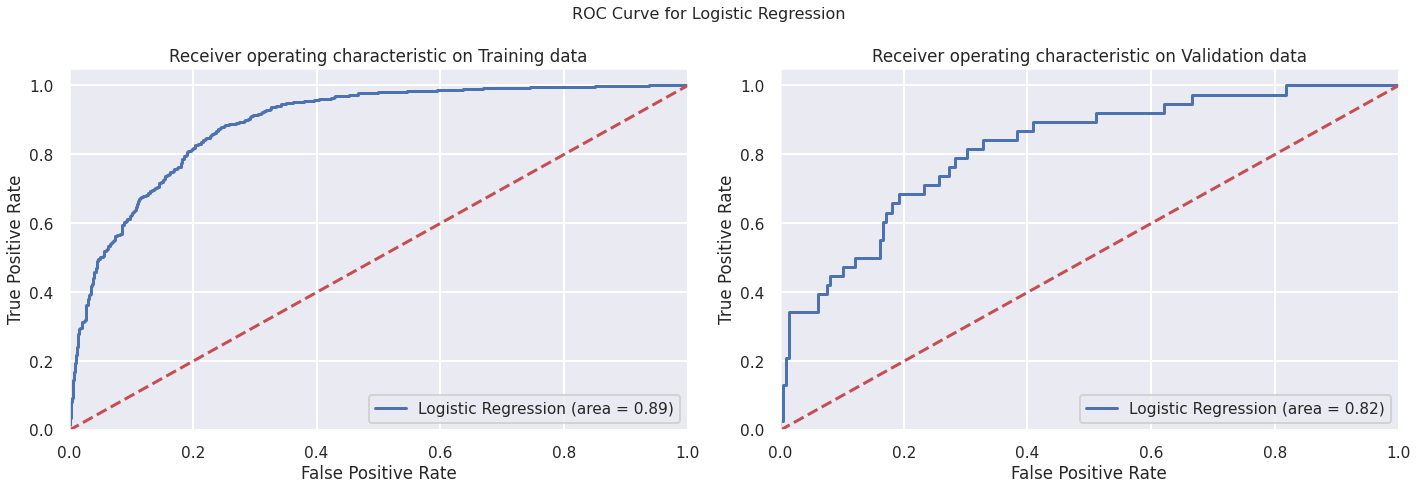

In [53]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Logistic Regression', fontsize = 16)
plt.subplot(121)
probs = log_reg.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = log_reg.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* We can see that the ROC value of 0.82 on the validation data.
* Which is a good score as it performs better.


### Hyper parameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# defining the parameters to tune

param_grid = {
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
             'C' : np.logspace(-3, 3, 100),
             }

grid_search = GridSearchCV(log_reg, param_grid, cv = 5, n_jobs = -1, verbose = True)

In [56]:
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=100),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             verbose=True)

In [57]:
grid_search.best_params_ # getting the best params from the tuned model

{'C': 0.5336699231206312, 'penalty': 'l1', 'solver': 'saga'}

In [58]:
log_reg_tuned = grid_search.best_estimator_

train_pred_1 = log_reg_tuned.predict(X_train_res) # prediction on training data using the best estimator from grid search
val_pred_1 = log_reg_tuned.predict(X_val_transformed) # prediction on validation data using the best estimator from grid search

In [59]:
# getting the accuracy and confusion matrix for the tuned model

train_acc_1 = accuracy_score(y_train_res, train_pred_1)
val_acc_1 = accuracy_score(y_val, val_pred_1)

train_conf_1 = confusion_matrix(y_train_res, train_pred_1)
val_conf_1 = confusion_matrix(y_val, val_pred_1)

In [60]:
print('Accuracy on the training data {:.2f}'.format(train_acc_1*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_1*100))

Accuracy on the training data 81.03
Accuracy on the validation data 70.76


In [61]:
print('Confusion matrix of the training data:')
print(train_conf_1)
print('\nConfusion matrix of the validation data:')
print(val_conf_1)

Confusion matrix of the training data:
[[620 168]
 [131 657]]

Confusion matrix of the validation data:
[[136  62]
 [  7  31]]


In [62]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_1))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_1))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       788
           1       0.80      0.83      0.81       788

    accuracy                           0.81      1576
   macro avg       0.81      0.81      0.81      1576
weighted avg       0.81      0.81      0.81      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       198
           1       0.33      0.82      0.47        38

    accuracy                           0.71       236
   macro avg       0.64      0.75      0.64       236
weighted avg       0.85      0.71      0.75       236



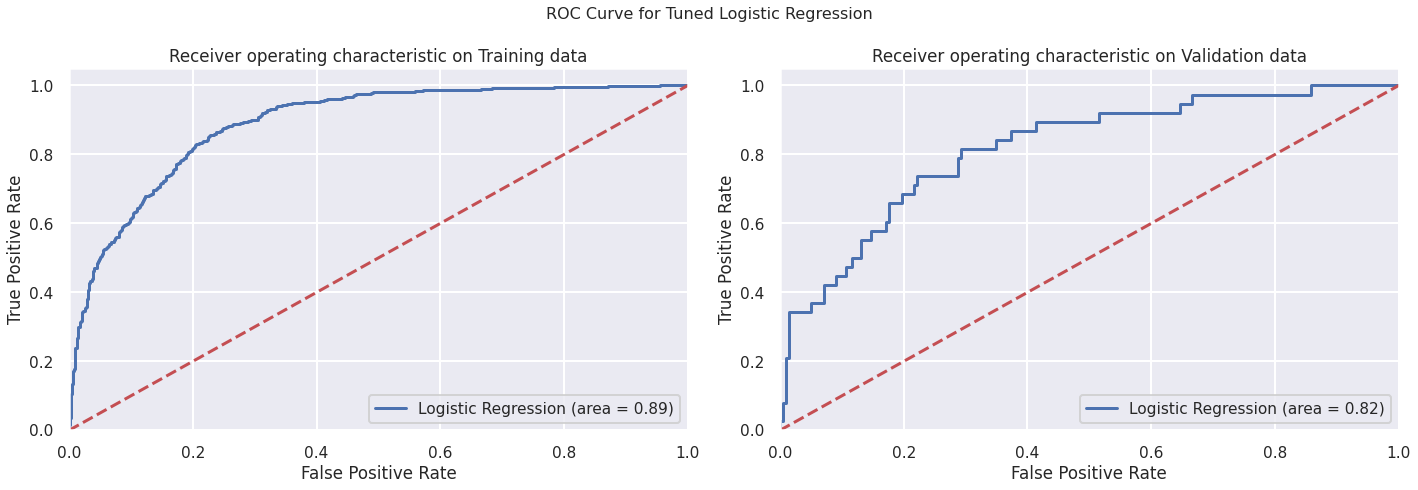

In [63]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned Logistic Regression', fontsize = 16)
plt.subplot(121)
probs = log_reg_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = log_reg_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score for the tuned model is 0.82 which is same as the untuned logistic regression model.

## Model 2: KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_jobs = -1) # initializing the model

In [66]:
knn.fit(X_train_res, y_train_res) # training the model on the oversampled data

KNeighborsClassifier(n_jobs=-1)

In [67]:
train_pred_2 = knn.predict(X_train_res) # prediction on training data
val_pred_2 = knn.predict(X_val_transformed) # prediction on validation data

In [68]:
# getting the accuracy and confusion matrix

train_acc_2 = accuracy_score(y_train_res, train_pred_2)
val_acc_2 = accuracy_score(y_val, val_pred_2)

train_conf_2 = confusion_matrix(y_train_res, train_pred_2)
val_conf_2 = confusion_matrix(y_val, val_pred_2)

In [69]:
print('Accuracy on the training data {:.2f}'.format(train_acc_2*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_2*100))

Accuracy on the training data 84.96
Accuracy on the validation data 58.90


In [70]:
print('Confusion matrix of the training data:')
print(train_conf_2)
print('\nConfusion matrix of the validation data:')
print(val_conf_2)

Confusion matrix of the training data:
[[552 236]
 [  1 787]]

Confusion matrix of the validation data:
[[113  85]
 [ 12  26]]


In [71]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_2))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_2))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       788
           1       0.77      1.00      0.87       788

    accuracy                           0.85      1576
   macro avg       0.88      0.85      0.85      1576
weighted avg       0.88      0.85      0.85      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       198
           1       0.23      0.68      0.35        38

    accuracy                           0.59       236
   macro avg       0.57      0.63      0.52       236
weighted avg       0.80      0.59      0.64       236



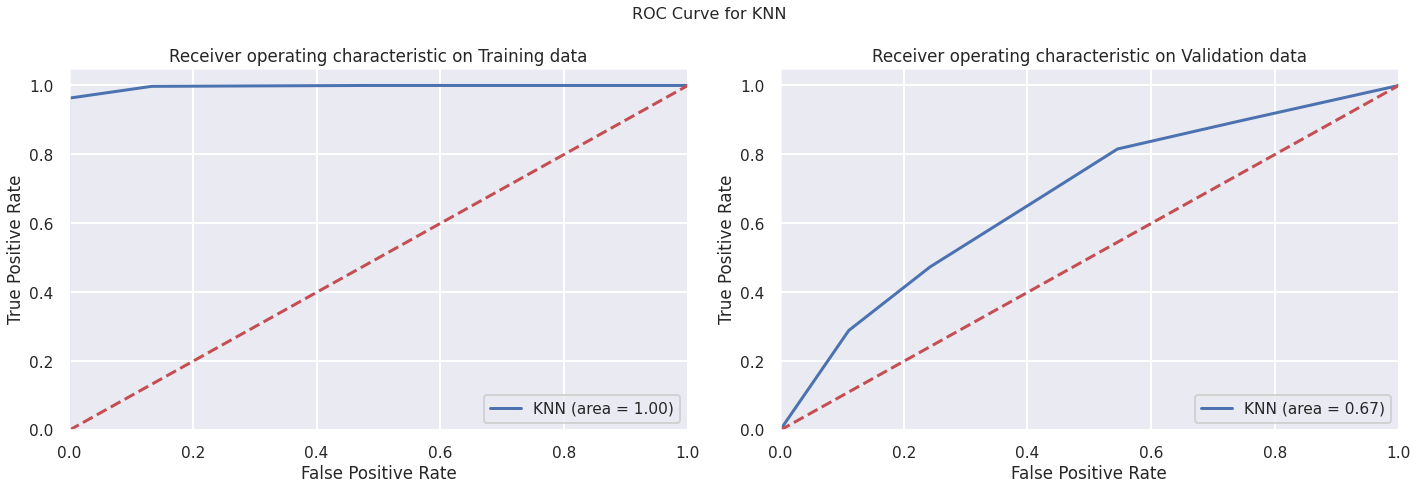

In [72]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for KNN', fontsize = 16)
plt.subplot(121)
probs = knn.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = knn.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score for the KNN model is 0.67.
* Which is low compared to the logistic regression model.

### Hyper parameter tuning

In [73]:
# defining the parameters to tune

param_grid = {
    'n_neighbors' : range(2, 21),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'leaf_size' : range(20, 42, 2),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : (1, 2)
}

grid_search = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1, verbose = 1)

In [74]:
grid_search.fit(X_train_res, y_train_res) 

Fitting 5 folds for each of 6688 candidates, totalling 33440 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 42, 2),
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 21), 'p': (1, 2),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [75]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [76]:
knn_tuned = grid_search.best_estimator_

train_pred_2 = knn_tuned.predict(X_train_res) # prediction on training data 
val_pred_2 = knn_tuned.predict(X_val_transformed) # prediction on validation data

In [77]:
train_acc_2 = accuracy_score(y_train_res, train_pred_2)
val_acc_2 = accuracy_score(y_val, val_pred_2)

train_conf_2 = confusion_matrix(y_train_res, train_pred_2)
val_conf_2 = confusion_matrix(y_val, val_pred_2)

In [78]:
print('Accuracy on the training data {:.2f}'.format(train_acc_2*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_2*100))

Accuracy on the training data 99.94
Accuracy on the validation data 80.08


In [79]:
print('Confusion matrix of the training data:')
print(train_conf_2)
print('\nConfusion matrix of the validation data:')
print(val_conf_2)

Confusion matrix of the training data:
[[788   0]
 [  1 787]]

Confusion matrix of the validation data:
[[177  21]
 [ 26  12]]


In [80]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_2))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_2))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       198
           1       0.36      0.32      0.34        38

    accuracy                           0.80       236
   macro avg       0.62      0.60      0.61       236
weighted avg       0.79      0.80      0.80       236



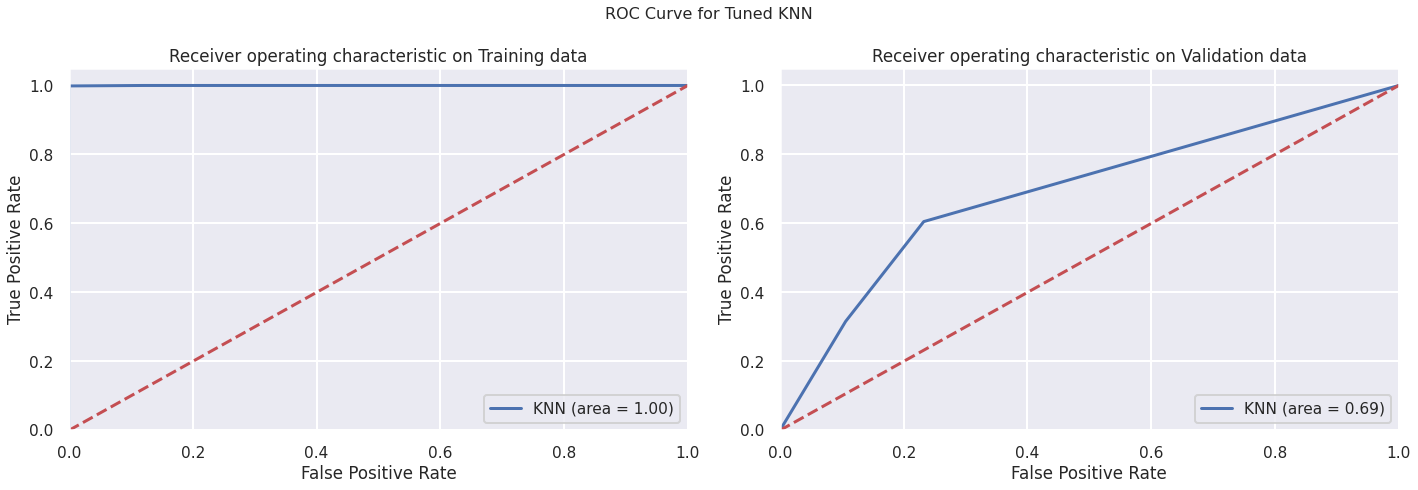

In [81]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned KNN', fontsize = 16)
plt.subplot(121)
probs = knn_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = knn_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that there is a slight increase in the ROC score of the tuned KNN model.
* But not so significant to get close to logistic regression model.

## Model 3: Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
naive_bayes = GaussianNB() # initializing the model

In [84]:
naive_bayes.fit(X_train_res, y_train_res) # training the model

GaussianNB()

In [85]:
train_pred_3 = naive_bayes.predict(X_train_res) # prediction on training data
val_pred_3 = naive_bayes.predict(X_val_transformed) # prediction on validation data

In [86]:
train_acc_3 = accuracy_score(y_train_res, train_pred_3)
val_acc_3 = accuracy_score(y_val, val_pred_3)

train_conf_3 = confusion_matrix(y_train_res, train_pred_3)
val_conf_3 = confusion_matrix(y_val, val_pred_3)

In [87]:
print('Accuracy on the training data {:.2f}'.format(train_acc_3*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_3*100))

Accuracy on the training data 70.56
Accuracy on the validation data 53.81


In [88]:
print('Confusion matrix of the training data:')
print(train_conf_3)
print('\nConfusion matrix of the validation data:')
print(val_conf_3)

Confusion matrix of the training data:
[[470 318]
 [146 642]]

Confusion matrix of the validation data:
[[102  96]
 [ 13  25]]


In [89]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_3))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_3))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       788
           1       0.67      0.81      0.73       788

    accuracy                           0.71      1576
   macro avg       0.72      0.71      0.70      1576
weighted avg       0.72      0.71      0.70      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.89      0.52      0.65       198
           1       0.21      0.66      0.31        38

    accuracy                           0.54       236
   macro avg       0.55      0.59      0.48       236
weighted avg       0.78      0.54      0.60       236



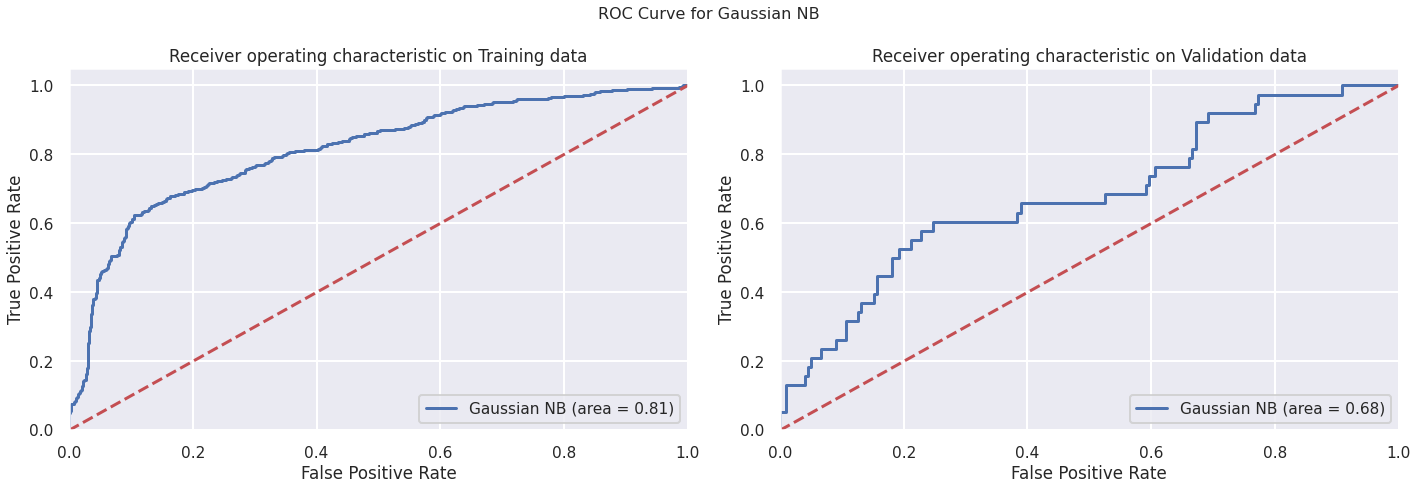

In [90]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Gaussian NB', fontsize = 16)
plt.subplot(121)
probs = naive_bayes.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = naive_bayes.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score for the Gaussian NB model is 0.68.
* Which is lesser compared to the logistic regression model.

### Hyper parameter Tuning

In [91]:
param_grid = {'var_smoothing': np.logspace(-10, 10, 500)}

grid_search = GridSearchCV(naive_bayes, param_grid, cv = 5, verbose = 1, n_jobs = -1)

In [92]:
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-10, 1.09668060e-10, 1.20270833e-10, 1.31898690e-10,
       1.44650734e-10, 1.58635653e-10, 1.73972643e-10, 1.90792422e-10,
       2.09238348e-10, 2.29467637e-10, 2.51652705e-10, 2.75982639e-10,
       3.02664806e-10, 3.31926620e-10, 3.64017485e-10, 3.99210913e-10,
       4.37806863e-10, 4.8013429...
       1.19717134e+09, 1.31291459e+09, 1.43984795e+09, 1.57905331e+09,
       1.73171713e+09, 1.89914058e+09, 2.08275063e+09, 2.28411221e+09,
       2.50494154e+09, 2.74712079e+09, 3.01271407e+09, 3.30398507e+09,
       3.62341632e+09, 3.97373038e+09, 4.35791301e+09, 4.77923865e+09,
       5.24129830e+09, 5.74803016e+09, 6.30375315e+09, 6.91320378e+09,
       7.58157646e+09, 8.31456781e+09, 9.11842520e+09, 1.00000000e+10])},
             verbose=1)

In [93]:
naive_bayes_tuned = grid_search.best_estimator_

train_pred_3 = naive_bayes_tuned.predict(X_train_res) # prediction on training data 
val_pred_3 = naive_bayes_tuned.predict(X_val_transformed) # prediction on validation data

In [94]:
train_acc_3 = accuracy_score(y_train_res, train_pred_3)
val_acc_3 = accuracy_score(y_val, val_pred_3)

train_conf_3 = confusion_matrix(y_train_res, train_pred_3)
val_conf_3 = confusion_matrix(y_val, val_pred_3)

In [95]:
print('Accuracy on the training data {:.2f}'.format(train_acc_3*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_3*100))

Accuracy on the training data 72.21
Accuracy on the validation data 56.78


In [96]:
print('Confusion matrix of the training data:')
print(train_conf_3)
print('\nConfusion matrix of the validation data:')
print(val_conf_3)

Confusion matrix of the training data:
[[478 310]
 [128 660]]

Confusion matrix of the validation data:
[[106  92]
 [ 10  28]]


In [97]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_3))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_3))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       788
           1       0.68      0.84      0.75       788

    accuracy                           0.72      1576
   macro avg       0.73      0.72      0.72      1576
weighted avg       0.73      0.72      0.72      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       198
           1       0.23      0.74      0.35        38

    accuracy                           0.57       236
   macro avg       0.57      0.64      0.51       236
weighted avg       0.80      0.57      0.62       236



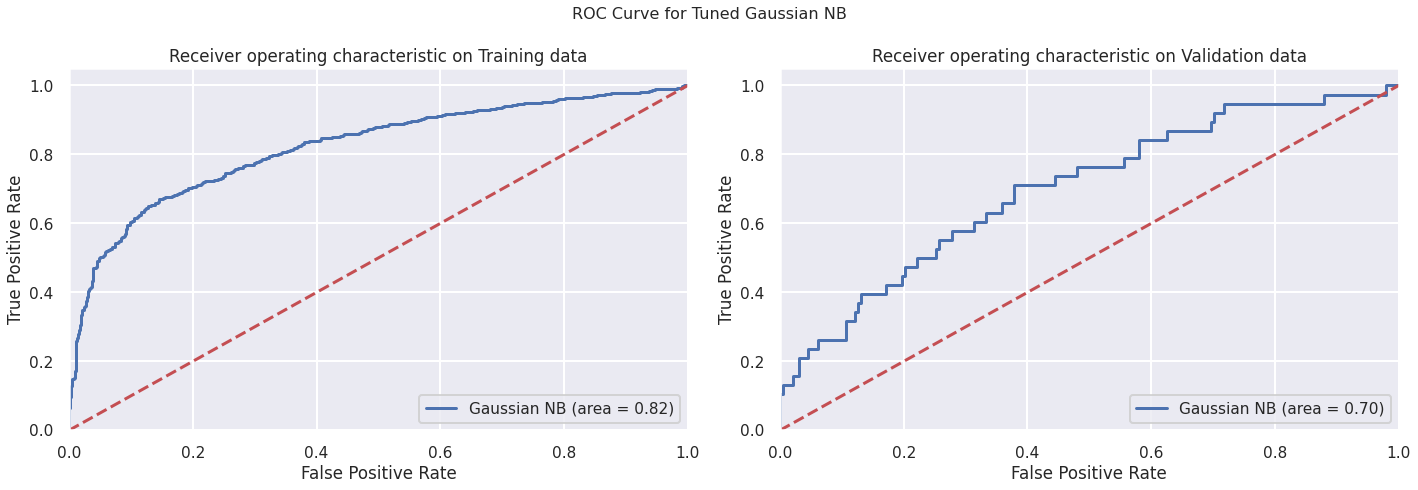

In [98]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned Gaussian NB', fontsize = 16)
plt.subplot(121)
probs = naive_bayes_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = naive_bayes_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Gaussian NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the tuned Gaussian NB has a ROC score of 0.7 which is greater than tuned KNN model.
* But still logistic regression has a better ROC score from the above trained models.

## Model 4: Decision Trees

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dec_tree = DecisionTreeClassifier(random_state = 100) # initializing the model

In [101]:
dec_tree.fit(X_train_res, y_train_res) # training the model

DecisionTreeClassifier(random_state=100)

In [102]:
train_pred_4 = dec_tree.predict(X_train_res) # prediction on training data
val_pred_4 = dec_tree.predict(X_val_transformed) # prediction on validation data

In [103]:
train_acc_4 = accuracy_score(y_train_res, train_pred_4)
val_acc_4 = accuracy_score(y_val, val_pred_4)

train_conf_4 = confusion_matrix(y_train_res, train_pred_4)
val_conf_4 = confusion_matrix(y_val, val_pred_4)

In [104]:
print('Accuracy on the training data {:.2f}'.format(train_acc_4*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_4*100))

Accuracy on the training data 100.00
Accuracy on the validation data 76.27


In [105]:
print('Confusion matrix of the training data:')
print(train_conf_4)
print('\nConfusion matrix of the validation data:')
print(val_conf_4)

Confusion matrix of the training data:
[[788   0]
 [  0 788]]

Confusion matrix of the validation data:
[[163  35]
 [ 21  17]]


In [106]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_4))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_4))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       198
           1       0.33      0.45      0.38        38

    accuracy                           0.76       236
   macro avg       0.61      0.64      0.62       236
weighted avg       0.80      0.76      0.78       236



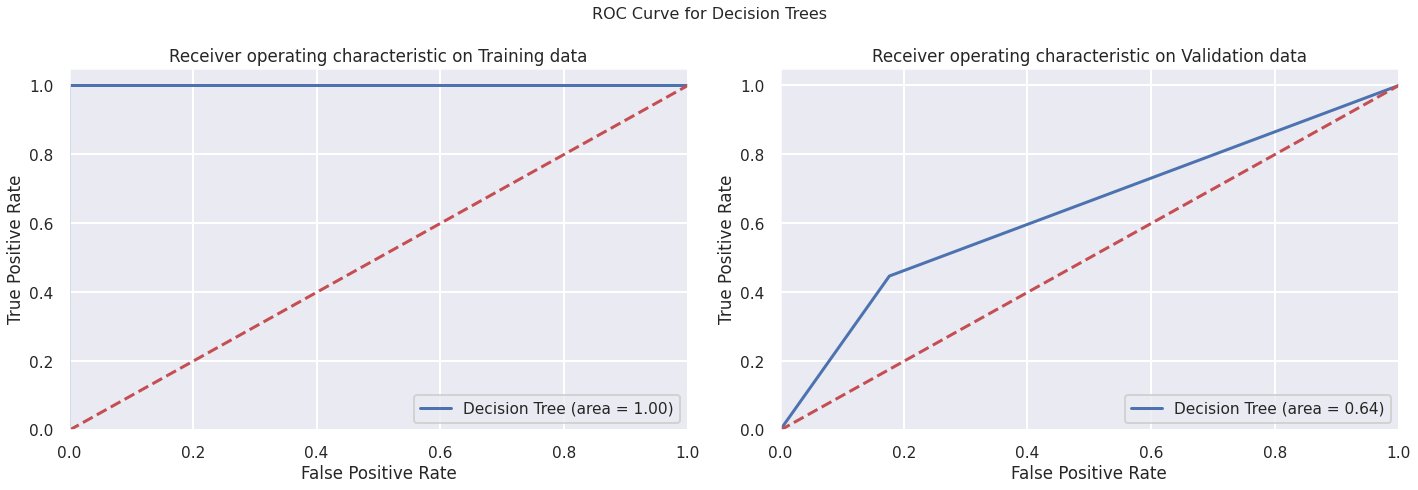

In [107]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Decision Trees', fontsize = 16)
plt.subplot(121)
probs = dec_tree.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = dec_tree.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score of Decision Tree model on the validation data is 0.64 and that of training data is 1.
* Here we can see that the model is overfitting the data and needs to be tuned to have a generalised model.

### Hyper parameter tuning

In [108]:
param_grid = {
        'max_depth' : range(4, 12, 2),
        'min_samples_split' : range(30, 110, 10),
        'criterion' :['gini', 'entropy'],
        'max_leaf_nodes' : range(6, 20, 2),
        'min_weight_fraction_leaf' : [0, 0.5],
        #'max_features' : ['auto','sqrt', 'log2'],
        #'ccp_alpha' : range(1, 21, 2)
}

grid_search = GridSearchCV(dec_tree, param_grid, cv = 5, verbose = 1, n_jobs = -1)

In [109]:
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 12, 2),
                         'max_leaf_nodes': range(6, 20, 2),
                         'min_samples_split': range(30, 110, 10),
                         'min_weight_fraction_leaf': [0, 0.5]},
             verbose=1)

In [110]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 18,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0}

In [111]:
dec_tree_tuned = grid_search.best_estimator_

train_pred_4 = dec_tree_tuned.predict(X_train_res) # prediction on training data
val_pred_4 = dec_tree_tuned.predict(X_val_transformed) # prediction on validation data

In [112]:
train_acc_4 = accuracy_score(y_train_res, train_pred_4)
val_acc_4 = accuracy_score(y_val, val_pred_4)

train_conf_4 = confusion_matrix(y_train_res, train_pred_4)
val_conf_4 = confusion_matrix(y_val, val_pred_4)

In [113]:
print('Accuracy on the training data {:.2f}'.format(train_acc_4*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_4*100))

Accuracy on the training data 87.94
Accuracy on the validation data 74.15


In [114]:
print('Confusion matrix of the training data:')
print(train_conf_4)
print('\nConfusion matrix of the validation data:')
print(val_conf_4)

Confusion matrix of the training data:
[[706  82]
 [108 680]]

Confusion matrix of the validation data:
[[158  40]
 [ 21  17]]


In [115]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_4))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_4))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       788
           1       0.89      0.86      0.88       788

    accuracy                           0.88      1576
   macro avg       0.88      0.88      0.88      1576
weighted avg       0.88      0.88      0.88      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       198
           1       0.30      0.45      0.36        38

    accuracy                           0.74       236
   macro avg       0.59      0.62      0.60       236
weighted avg       0.79      0.74      0.76       236



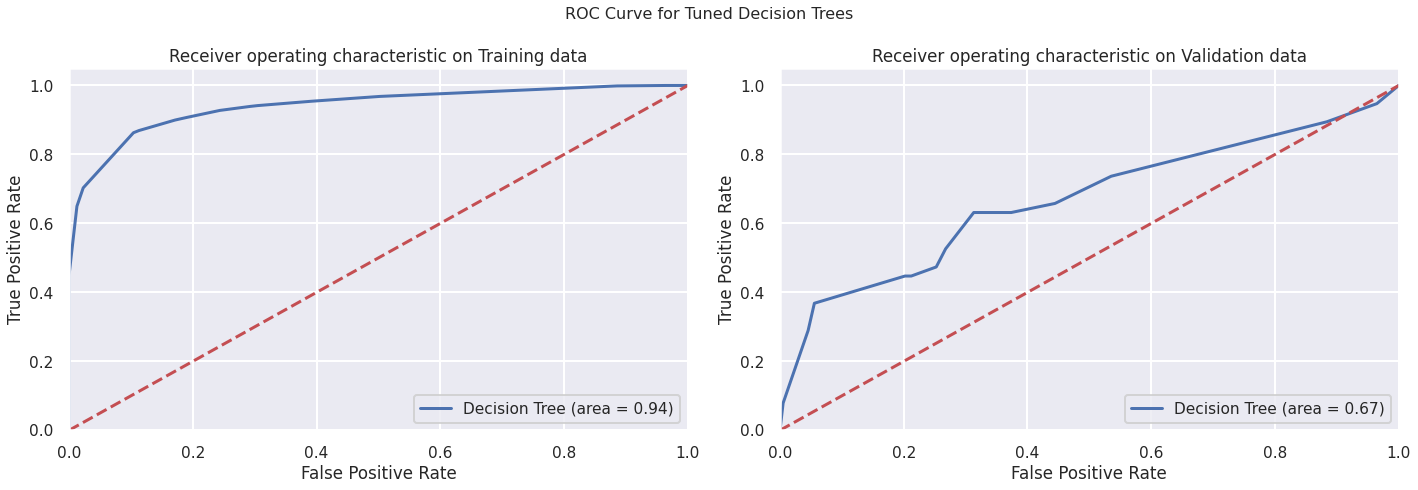

In [116]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned Decision Trees', fontsize = 16)
plt.subplot(121)
probs = dec_tree_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = dec_tree_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that there is a increase in the ROC score on validation data.
* But still the ROC score is less compares to the logistic regression.

## Model 5: Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rand_forest = RandomForestClassifier(n_jobs = -1, random_state = 100) # initializing the model

In [119]:
rand_forest.fit(X_train_res, y_train_res) # training the model

RandomForestClassifier(n_jobs=-1, random_state=100)

In [120]:
train_pred_5 = rand_forest.predict(X_train_res) # prediction on training data
val_pred_5 = rand_forest.predict(X_val_transformed) # prediction on validation data

In [121]:
train_acc_5 = accuracy_score(y_train_res, train_pred_5)
val_acc_5 = accuracy_score(y_val, val_pred_5)

train_conf_5 = confusion_matrix(y_train_res, train_pred_5)
val_conf_5 = confusion_matrix(y_val, val_pred_5)

In [122]:
print('Accuracy on the training data {:.2f}'.format(train_acc_5*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_5*100))

Accuracy on the training data 100.00
Accuracy on the validation data 86.44


In [123]:
print('Confusion matrix of the training data:')
print(train_conf_5)
print('\nConfusion matrix of the validation data:')
print(val_conf_5)

Confusion matrix of the training data:
[[788   0]
 [  0 788]]

Confusion matrix of the validation data:
[[193   5]
 [ 27  11]]


In [124]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_5))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_5))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       198
           1       0.69      0.29      0.41        38

    accuracy                           0.86       236
   macro avg       0.78      0.63      0.67       236
weighted avg       0.85      0.86      0.84       236



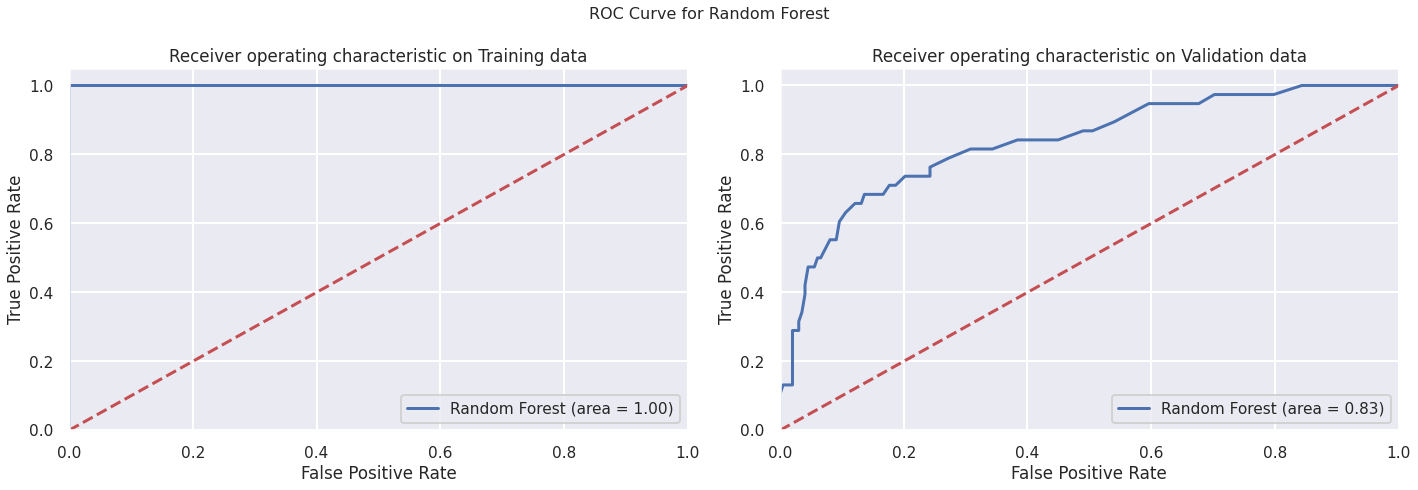

In [125]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Random Forest', fontsize = 16)
plt.subplot(121)
probs = rand_forest.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = rand_forest.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score on testing data is 0.83 which is a bit greater than logistic regression ROC score.
* But there is a overfitting problem that needs to resolved by tuning the hyper parameters.

### Hyper parameter tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
param_grid = {
                'n_estimators' : range(10, 110, 10),
                'max_depth' : range(2, 10),
                'criterion' : ['gini', 'entropy'],
                'min_samples_split' : range(40, 240),
                'min_weight_fraction_leaf' : [0, 0.5],
                'oob_score' : [True, False],
                'min_samples_leaf' : range(5, 30),
                
}

random_search = RandomizedSearchCV(rand_forest, param_grid, cv = 5,  n_jobs = -1, 
                                   n_iter = 25, verbose = 1, random_state = 10)

In [128]:
random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'min_samples_leaf': range(5, 30),
                                        'min_samples_split': range(40, 240),
                                        'min_weight_fraction_leaf': [0, 0.5],
                                        'n_estimators': range(10, 110, 10),
                                        'oob_score': [True, False]},
                   random_state=10, verbose=1)

In [129]:
random_search.best_params_

{'oob_score': True,
 'n_estimators': 50,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 53,
 'min_samples_leaf': 24,
 'max_depth': 7,
 'criterion': 'gini'}

In [130]:
rand_forest_tuned = random_search.best_estimator_

train_pred_5 = rand_forest_tuned.predict(X_train_res) # prediction on training data
val_pred_5 = rand_forest_tuned.predict(X_val_transformed) # prediction on validation data

In [131]:
train_acc_5 = accuracy_score(y_train_res, train_pred_5)
val_acc_5 = accuracy_score(y_val, val_pred_5)

train_conf_5 = confusion_matrix(y_train_res, train_pred_5)
val_conf_5 = confusion_matrix(y_val, val_pred_5)

In [132]:
print('Accuracy on the training data {:.2f}'.format(train_acc_5*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_5*100))

Accuracy on the training data 91.56
Accuracy on the validation data 85.59


In [133]:
print('Confusion matrix of the training data:')
print(train_conf_5)
print('\nConfusion matrix of the validation data:')
print(val_conf_5)

Confusion matrix of the training data:
[[750  38]
 [ 95 693]]

Confusion matrix of the validation data:
[[182  16]
 [ 18  20]]


In [134]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_5))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_5))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       788
           1       0.95      0.88      0.91       788

    accuracy                           0.92      1576
   macro avg       0.92      0.92      0.92      1576
weighted avg       0.92      0.92      0.92      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       198
           1       0.56      0.53      0.54        38

    accuracy                           0.86       236
   macro avg       0.73      0.72      0.73       236
weighted avg       0.85      0.86      0.85       236



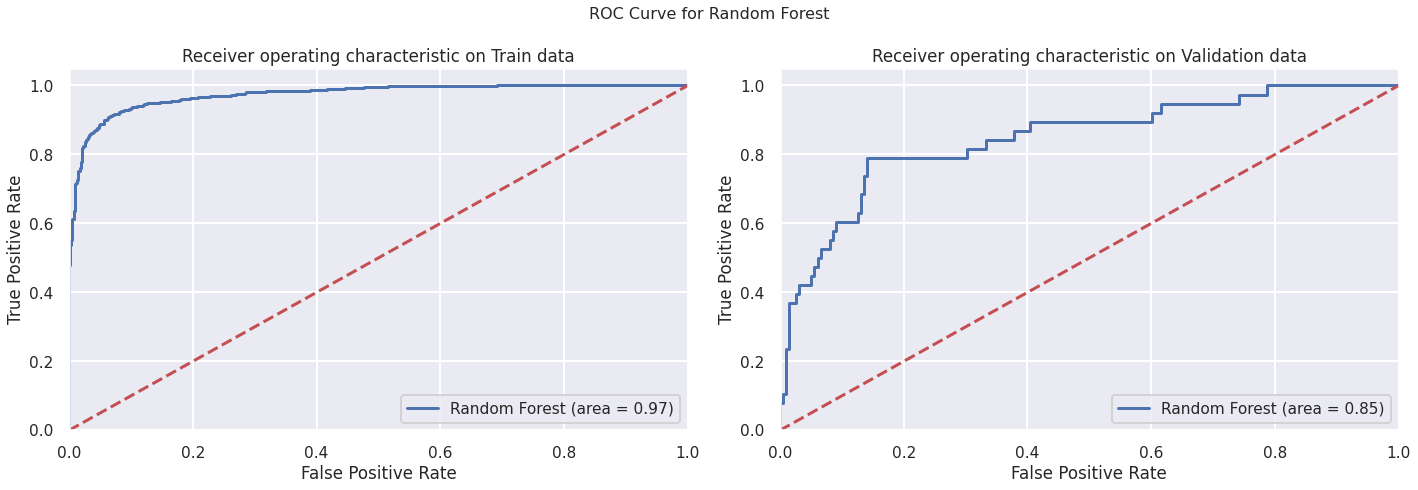

In [135]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Random Forest', fontsize = 16)
plt.subplot(121)
probs = rand_forest_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Train data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = rand_forest_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that there is a increase in the ROC score on the test data for the tuned Random Forest model.
* Also now it has a ROC score slightly greater than the tuned logistic regression model.

## Model 6: XGBoost

In [136]:
from xgboost import XGBClassifier

In [137]:
xgb = XGBClassifier(n_jobs = -1, random_state = 100) # initializing the model

In [138]:
xgb.fit(X_train_res, y_train_res) # training the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, ...)

In [139]:
train_pred_6 = xgb.predict(X_train_res) # prediction on training data
val_pred_6 = xgb.predict(X_val_transformed) # prediction on validation data

In [140]:
train_acc_6 = accuracy_score(y_train_res, train_pred_6)
val_acc_6 = accuracy_score(y_val, val_pred_6)

train_conf_6 = confusion_matrix(y_train_res, train_pred_6)
val_conf_6 = confusion_matrix(y_val, val_pred_6)

In [141]:
print('Accuracy on the training data {:.2f}'.format(train_acc_6*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_6*100))

Accuracy on the training data 100.00
Accuracy on the validation data 86.02


In [142]:
print('Confusion matrix of the training data:')
print(train_conf_6)
print('\nConfusion matrix of the validation data:')
print(val_conf_6)

Confusion matrix of the training data:
[[788   0]
 [  0 788]]

Confusion matrix of the validation data:
[[185  13]
 [ 20  18]]


In [143]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_6))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_6))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       198
           1       0.58      0.47      0.52        38

    accuracy                           0.86       236
   macro avg       0.74      0.70      0.72       236
weighted avg       0.85      0.86      0.85       236



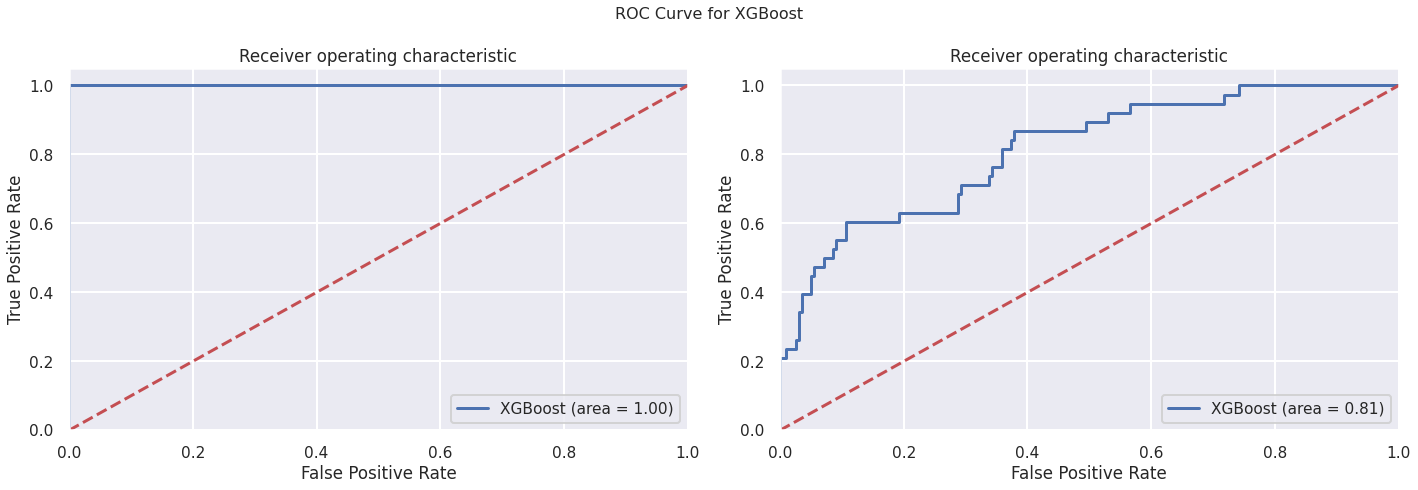

In [144]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for XGBoost', fontsize = 16)
plt.subplot(121)
probs = xgb.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = xgb.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can that the ROC score on the testing data is 0.81 which is less compared to the Random Forest model trained above.
* Also there is a case of overfitting here that needs to be taken care of.

### Hyper parameter Tuning

In [145]:
param_distributions = {
                        'n_estimators': range(10, 210, 10),
                        'max_depth': range(2, 14),
                        'booster' : ['gbtree', 'gblinear', 'dart'],
                        'max_leaves' : range(3, 10),
                        'gamma' : np.logspace(-5, 5, 100),
                        'learning_rate' : np.logspace(-2, 2, 50),
                        #'classifier__subsample' : [0.2, 0.4, 0.6, 0.8, 1],
                        'reg_alpha': np.logspace(-3, 3, 100),
                        'reg_lambda': np.logspace(-3, 3, 100),
                        #'base_score': [0.2, 0.5, 1],
                        #'classifier__max_leaves' : range(2, 5),
                        
}

random_search = RandomizedSearchCV(xgb, param_distributions, cv = 5, random_state = 100, 
                                   n_iter = 25, n_jobs = -1, verbose = 1)

In [146]:
random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[06:37:38] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:37:38] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+

In [147]:
random_search.best_params_

{'reg_lambda': 0.6135907273413176,
 'reg_alpha': 0.07564633275546291,
 'n_estimators': 90,
 'max_leaves': 9,
 'max_depth': 5,
 'learning_rate': 0.054286754393238594,
 'gamma': 0.44306214575838776,
 'booster': 'dart'}

In [148]:
xgb_tuned = random_search.best_estimator_

train_pred_6 = xgb_tuned.predict(X_train_res) # prediction on training data
val_pred_6 = xgb_tuned.predict(X_val_transformed) # prediction on validation data

In [149]:
train_acc_6 = accuracy_score(y_train_res, train_pred_6)
val_acc_6 = accuracy_score(y_val, val_pred_6)

train_conf_6 = confusion_matrix(y_train_res, train_pred_6)
val_conf_6 = confusion_matrix(y_val, val_pred_6)

In [150]:
print('Accuracy on the training data {:.2f}'.format(train_acc_6*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_6*100))

Accuracy on the training data 98.22
Accuracy on the validation data 85.59


In [151]:
print('Confusion matrix of the training data:')
print(train_conf_6)
print('\nConfusion matrix of the validation data:')
print(val_conf_6)

Confusion matrix of the training data:
[[786   2]
 [ 26 762]]

Confusion matrix of the validation data:
[[186  12]
 [ 22  16]]


In [152]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_6))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_6))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       788
           1       1.00      0.97      0.98       788

    accuracy                           0.98      1576
   macro avg       0.98      0.98      0.98      1576
weighted avg       0.98      0.98      0.98      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       198
           1       0.57      0.42      0.48        38

    accuracy                           0.86       236
   macro avg       0.73      0.68      0.70       236
weighted avg       0.84      0.86      0.85       236



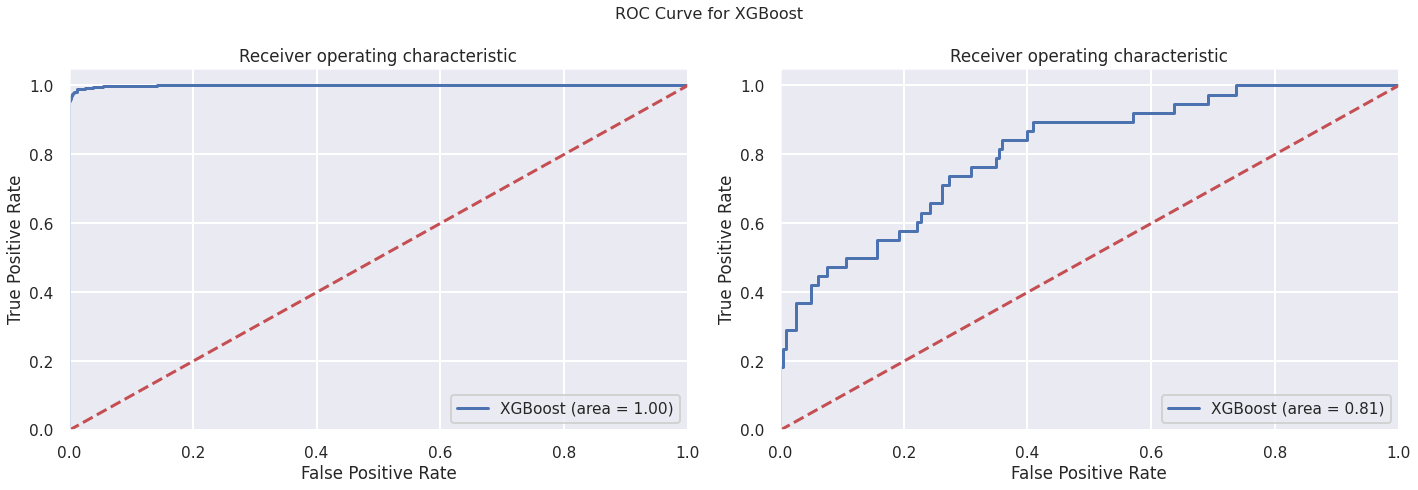

In [153]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for XGBoost', fontsize = 16)
plt.subplot(121)
probs = xgb_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = xgb_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that is there is no improvement in the ROC score for the tuned XGBoost model.
* So by far Random Forest has the best ROC score.

## Model 7: SVM

In [154]:
from sklearn.svm import SVC

In [155]:
svc = SVC(random_state = 100, probability = True) # inititalizing the model

In [156]:
svc.fit(X_train_res, y_train_res) # training the model

SVC(probability=True, random_state=100)

In [157]:
train_pred_7 = svc.predict(X_train_res) # prediction on training data
val_pred_7 = svc.predict(X_val_transformed) # prediction on validation data

In [158]:
train_acc_7 = accuracy_score(y_train_res, train_pred_7)
val_acc_7 = accuracy_score(y_val, val_pred_7)

train_conf_7 = confusion_matrix(y_train_res, train_pred_7)
val_conf_7 = confusion_matrix(y_val, val_pred_7)

In [159]:
print('Accuracy on the training data {:.2f}'.format(train_acc_7*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_7*100))

Accuracy on the training data 97.53
Accuracy on the validation data 83.05


In [160]:
print('Confusion matrix of the training data:')
print(train_conf_7)
print('\nConfusion matrix of the validation data:')
print(val_conf_7)

Confusion matrix of the training data:
[[757  31]
 [  8 780]]

Confusion matrix of the validation data:
[[174  24]
 [ 16  22]]


In [161]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_7))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_7))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       788
           1       0.96      0.99      0.98       788

    accuracy                           0.98      1576
   macro avg       0.98      0.98      0.98      1576
weighted avg       0.98      0.98      0.98      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       198
           1       0.48      0.58      0.52        38

    accuracy                           0.83       236
   macro avg       0.70      0.73      0.71       236
weighted avg       0.85      0.83      0.84       236



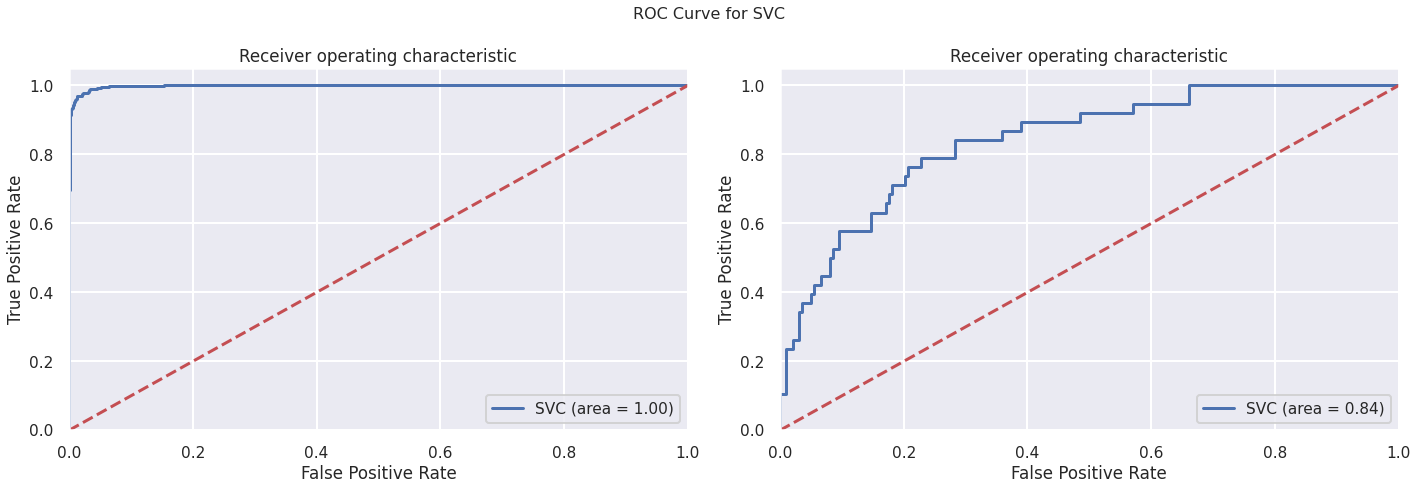

In [162]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for SVC', fontsize = 16)
plt.subplot(121)
probs = svc.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = svc.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score on the validation data is 0.84 which is close to ROC score for Random Forest.
* Also the model is overfitting the data that needs to be handled.

### Hyper parameter Tuning

In [163]:
param_distributions = {
                'C': np.logspace(-2, 2, 50),
                'gamma': ['scale', 'auto'],
                'kernel': ['rbf'],
                'decision_function_shape': ['ovo', 'ovr']
}

random_search = RandomizedSearchCV(svc, param_distributions, cv = 5, n_iter = 25, verbose = 1, n_jobs = -1)

In [164]:
random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=100),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01,...
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                       

In [165]:
random_search.best_params_

{'kernel': 'rbf',
 'gamma': 'scale',
 'decision_function_shape': 'ovo',
 'C': 18.420699693267146}

In [166]:
svc_tuned = random_search.best_estimator_

train_pred_7 = svc_tuned.predict(X_train_res) # prediction on training data
val_pred_7 = svc_tuned.predict(X_val_transformed) # prediction on validation data

In [167]:
train_acc_7 = accuracy_score(y_train_res, train_pred_7)
val_acc_7 = accuracy_score(y_val, val_pred_7)

train_conf_7 = confusion_matrix(y_train_res, train_pred_7)
val_conf_7 = confusion_matrix(y_val, val_pred_7)

In [168]:
print('Accuracy on the training data {:.2f}'.format(train_acc_7*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_7*100))

Accuracy on the training data 100.00
Accuracy on the validation data 84.75


In [169]:
print('Confusion matrix of the training data:')
print(train_conf_7)
print('\nConfusion matrix of the validation data:')
print(val_conf_7)

Confusion matrix of the training data:
[[788   0]
 [  0 788]]

Confusion matrix of the validation data:
[[181  17]
 [ 19  19]]


In [170]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_7))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_7))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       198
           1       0.53      0.50      0.51        38

    accuracy                           0.85       236
   macro avg       0.72      0.71      0.71       236
weighted avg       0.84      0.85      0.85       236



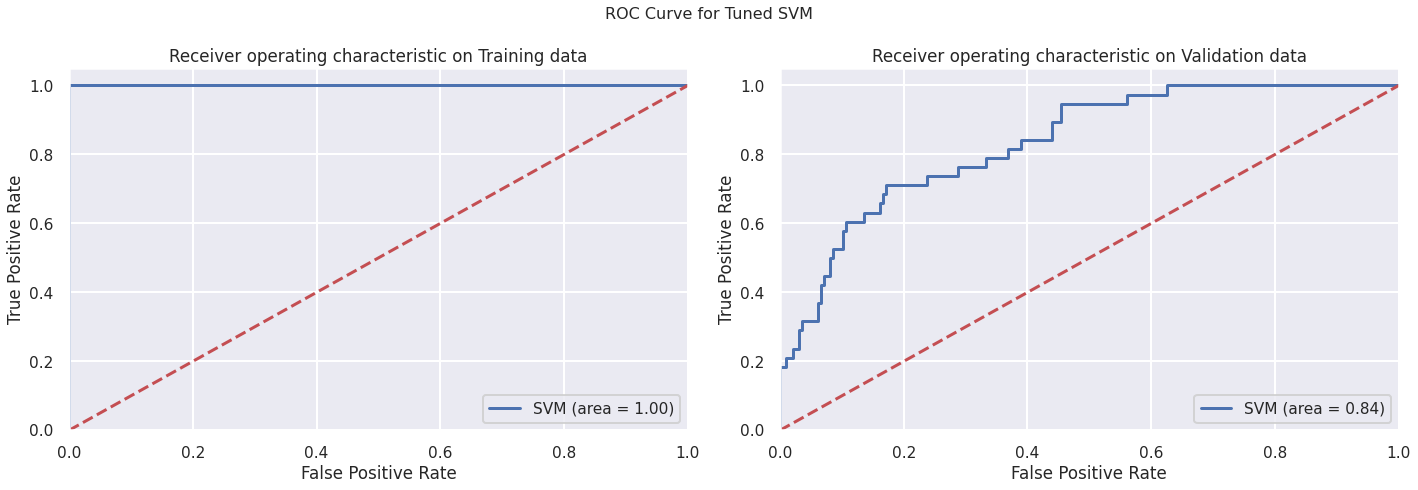

In [171]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned SVM', fontsize = 16)
plt.subplot(121)
probs = svc_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Training data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = svc_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score for the testing data is 0.84 which is same as the untuned SVM.
* Also there is a case of overfitting in the tuned model.

## Model 8: Extra Tree Classifier

In [172]:
from sklearn.ensemble import ExtraTreesClassifier

In [173]:
extra_tree = ExtraTreesClassifier(random_state = 100, n_jobs = -1) # initializing the model

In [174]:
extra_tree.fit(X_train_res, y_train_res) # training the model

ExtraTreesClassifier(n_jobs=-1, random_state=100)

In [175]:
train_pred_8 = extra_tree.predict(X_train_res) # prediction on training data
val_pred_8 = extra_tree.predict(X_val_transformed) # prediction on validation data

In [176]:
train_acc_8 = accuracy_score(y_train_res, train_pred_8)
val_acc_8 = accuracy_score(y_val, val_pred_8)

train_conf_8 = confusion_matrix(y_train_res, train_pred_8)
val_conf_8 = confusion_matrix(y_val, val_pred_8)

In [177]:
print('Accuracy on the training data {:.2f}'.format(train_acc_8*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_8*100))

Accuracy on the training data 100.00
Accuracy on the validation data 83.90


In [178]:
print('Confusion matrix of the training data:')
print(train_conf_8)
print('\nConfusion matrix of the validation data:')
print(val_conf_8)

Confusion matrix of the training data:
[[788   0]
 [  0 788]]

Confusion matrix of the validation data:
[[189   9]
 [ 29   9]]


In [179]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_8))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_8))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       788
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       198
           1       0.50      0.24      0.32        38

    accuracy                           0.84       236
   macro avg       0.68      0.60      0.62       236
weighted avg       0.81      0.84      0.81       236



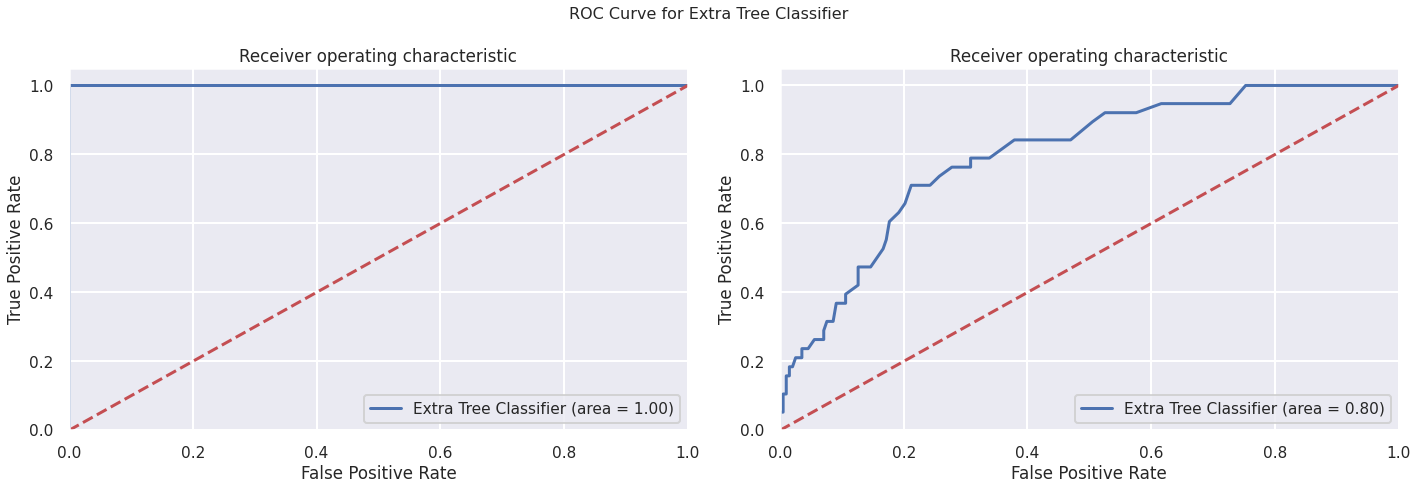

In [180]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Extra Tree Classifier', fontsize = 16)
plt.subplot(121)
probs = extra_tree.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Extra Tree Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = extra_tree.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Extra Tree Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.tight_layout()

### Hyper-parameter Tuning

In [181]:
param_grid = {
                'n_estimators' : range(10, 110),
                'max_depth' : range(2, 10),
                'criterion' : ['gini', 'entropy'],
                'min_samples_split' : range(40, 240),
                'min_weight_fraction_leaf' : [0, 0.5],
                #'oob_score' : [True, False],
                'min_samples_leaf' : range(5, 30),
                #'max_features': ['auto', 'sqrt', 'log2'],
                #'bootstrap': [True, False]
                
}

random_search = RandomizedSearchCV(extra_tree, param_grid, cv = 5,  n_jobs = -1, 
                                   n_iter = 25, verbose = 1, random_state = 10)

In [182]:
random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesClassifier(n_jobs=-1, random_state=100),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'min_samples_leaf': range(5, 30),
                                        'min_samples_split': range(40, 240),
                                        'min_weight_fraction_leaf': [0, 0.5],
                                        'n_estimators': range(10, 110)},
                   random_state=10, verbose=1)

In [183]:
random_search.best_params_

{'n_estimators': 87,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 82,
 'min_samples_leaf': 16,
 'max_depth': 9,
 'criterion': 'gini'}

In [184]:
extra_tree_tuned = random_search.best_estimator_

train_pred_8 = extra_tree_tuned.predict(X_train_res) # prediction on training data
val_pred_8 = extra_tree_tuned.predict(X_val_transformed) # prediction on validation data

In [185]:
train_acc_8 = accuracy_score(y_train_res, train_pred_8)
val_acc_8 = accuracy_score(y_val, val_pred_8)

train_conf_8 = confusion_matrix(y_train_res, train_pred_8)
val_conf_8 = confusion_matrix(y_val, val_pred_8)

In [186]:
print('Accuracy on the training data {:.2f}'.format(train_acc_8*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_8*100))

Accuracy on the training data 88.96
Accuracy on the validation data 83.47


In [187]:
print('Confusion matrix of the training data:')
print(train_conf_8)
print('\nConfusion matrix of the validation data:')
print(val_conf_8)

Confusion matrix of the training data:
[[723  65]
 [109 679]]

Confusion matrix of the validation data:
[[174  24]
 [ 15  23]]


In [188]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_8))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_8))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       788
           1       0.91      0.86      0.89       788

    accuracy                           0.89      1576
   macro avg       0.89      0.89      0.89      1576
weighted avg       0.89      0.89      0.89      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       198
           1       0.49      0.61      0.54        38

    accuracy                           0.83       236
   macro avg       0.70      0.74      0.72       236
weighted avg       0.85      0.83      0.84       236



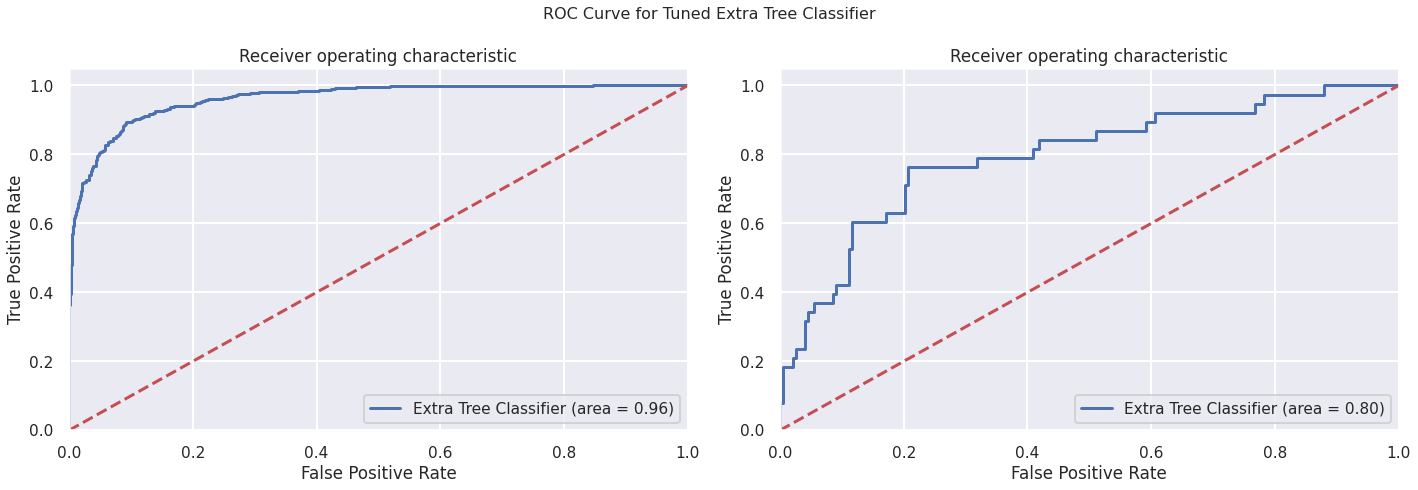

In [189]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned Extra Tree Classifier', fontsize = 16)
plt.subplot(121)
probs = extra_tree_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Extra Tree Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = extra_tree_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Extra Tree Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that the ROC score is 0.80 which is less compared to ROC score on Random Forest model.

## Model 9: AdaBoost

In [190]:
from sklearn.ensemble import AdaBoostClassifier

In [191]:
ada_boost = AdaBoostClassifier(base_estimator = log_reg, random_state = 100) # initializing the model

In [192]:
ada_boost.fit(X_train_res, y_train_res) # training the model

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=10000,
                                                     random_state=100),
                   random_state=100)

In [193]:
train_pred_9 = ada_boost.predict(X_train_res) # prediction on training data
val_pred_9 = ada_boost.predict(X_val_transformed) # prediction on validation data

In [194]:
train_acc_9 = accuracy_score(y_train_res, train_pred_9)
val_acc_9 = accuracy_score(y_val, val_pred_9)

train_conf_9 = confusion_matrix(y_train_res, train_pred_9)
val_conf_9 = confusion_matrix(y_val, val_pred_9)

In [195]:
print('Accuracy on the training data {:.2f}'.format(train_acc_9*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_9*100))

Accuracy on the training data 79.76
Accuracy on the validation data 72.46


In [196]:
print('Confusion matrix of the training data:')
print(train_conf_9)
print('\nConfusion matrix of the validation data:')
print(val_conf_9)

Confusion matrix of the training data:
[[628 160]
 [159 629]]

Confusion matrix of the validation data:
[[141  57]
 [  8  30]]


In [197]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_9))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_9))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       788
           1       0.80      0.80      0.80       788

    accuracy                           0.80      1576
   macro avg       0.80      0.80      0.80      1576
weighted avg       0.80      0.80      0.80      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       198
           1       0.34      0.79      0.48        38

    accuracy                           0.72       236
   macro avg       0.65      0.75      0.65       236
weighted avg       0.85      0.72      0.76       236



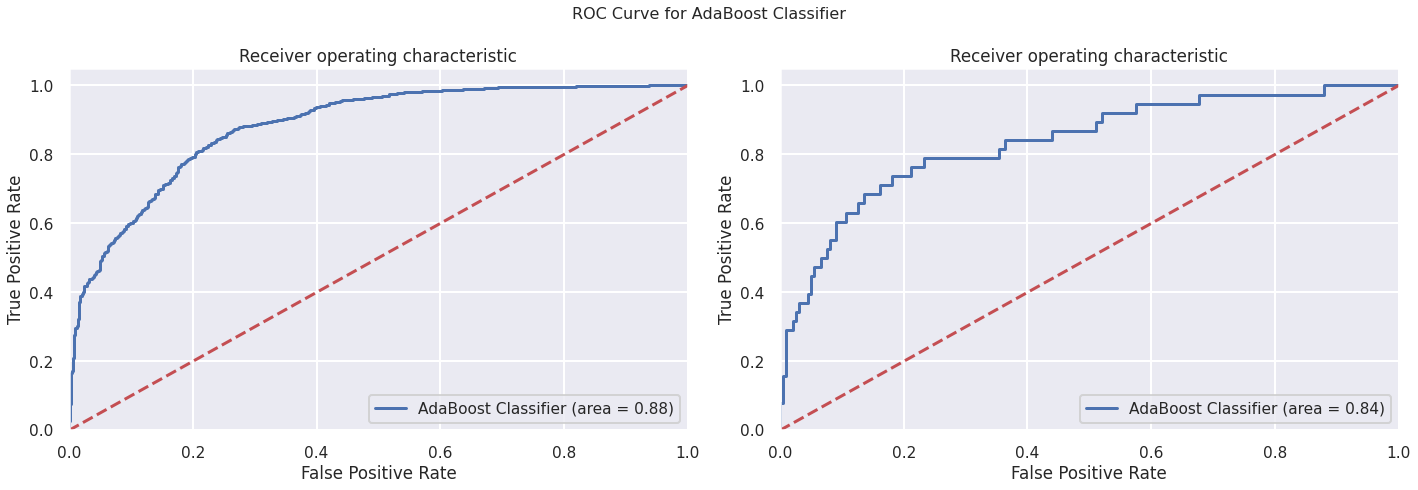

In [198]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for AdaBoost Classifier', fontsize = 16)
plt.subplot(121)
probs = ada_boost.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'AdaBoost Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = ada_boost.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'AdaBoost Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we have a ROC score of 0.84 on the validation data which is close to the ROC score of Random Forest model.

### Hyper-parameter Tuning

In [199]:
param_distributions = {
                'n_estimators': range(100, 1000),
                'learning_rate': np.logspace(-3, 3, 100),
}

random_search = RandomizedSearchCV(ada_boost, param_distributions, n_iter = 25, cv = 5, verbose = 1, n_jobs = -1)

In [200]:
random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=10000,
                                                                                  random_state=100),
                                                random_state=100),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
 

In [201]:
random_search.best_params_

{'n_estimators': 849, 'learning_rate': 0.23101297000831605}

In [202]:
ada_boost_tuned = random_search.best_estimator_

train_pred_9 = ada_boost_tuned.predict(X_train_res) # prediction on training data
val_pred_9 = ada_boost_tuned.predict(X_val_transformed) # prediction on validation data

In [203]:
train_acc_9 = accuracy_score(y_train_res, train_pred_9)
val_acc_9 = accuracy_score(y_val, val_pred_9)

train_conf_9 = confusion_matrix(y_train_res, train_pred_9)
val_conf_9 = confusion_matrix(y_val, val_pred_9)

In [204]:
print('Accuracy on the training data {:.2f}'.format(train_acc_9*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_9*100))

Accuracy on the training data 79.57
Accuracy on the validation data 72.03


In [205]:
print('Confusion matrix of the training data:')
print(train_conf_9)
print('\nConfusion matrix of the validation data:')
print(val_conf_9)

Confusion matrix of the training data:
[[626 162]
 [160 628]]

Confusion matrix of the validation data:
[[141  57]
 [  9  29]]


In [206]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_9))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_9))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       788
           1       0.79      0.80      0.80       788

    accuracy                           0.80      1576
   macro avg       0.80      0.80      0.80      1576
weighted avg       0.80      0.80      0.80      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       198
           1       0.34      0.76      0.47        38

    accuracy                           0.72       236
   macro avg       0.64      0.74      0.64       236
weighted avg       0.84      0.72      0.76       236



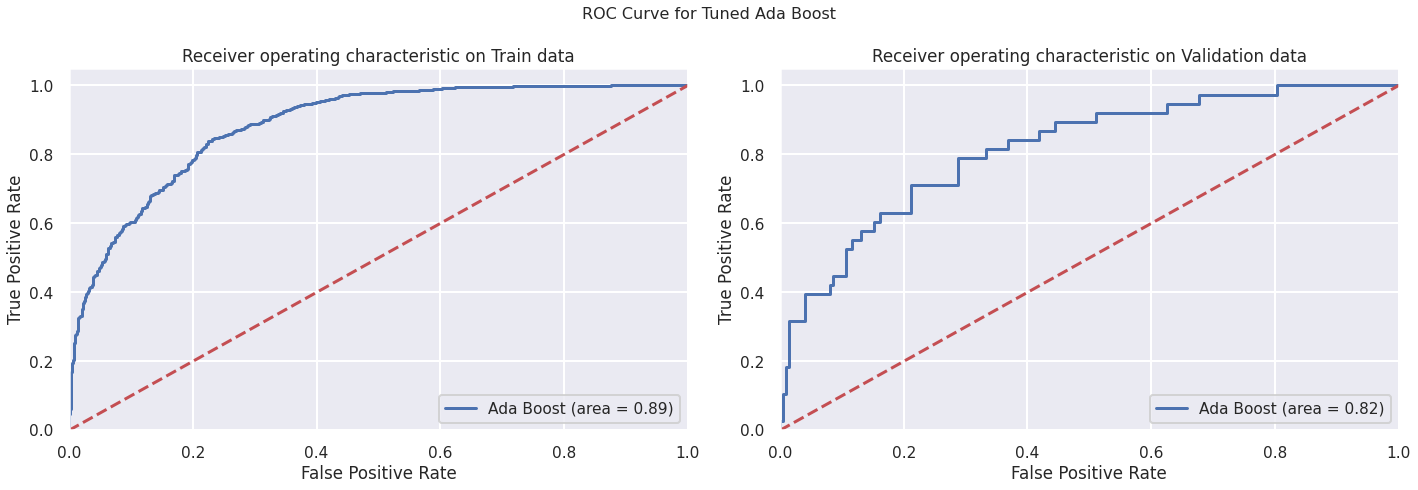

In [207]:
plt.figure(figsize = (20, 7))

plt.suptitle('ROC Curve for Tuned Ada Boost', fontsize = 16)
plt.subplot(121)
probs = ada_boost_tuned.predict_proba(X_train_res)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train_res, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Ada Boost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Train data')
plt.legend(loc = 'lower right')

plt.subplot(122)
probs = ada_boost_tuned.predict_proba(X_val_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_val, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Ada Boost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on Validation data')
plt.legend(loc = 'lower right')

plt.tight_layout()

* Here we can see that tuning reduces the ROC score on the validation data.
* So we can use the untuned model since it has a better ROC score.

## Final Model

Here we can use the models that gave a good ROC score and pass them into a voting classifier to the get the final model.

In [208]:
from sklearn.ensemble import VotingClassifier

In [209]:
estimators = [('logistic_regression', log_reg_tuned), ('random_forest', rand_forest_tuned), ('SVM', svc_tuned), ('AdaBoost', ada_boost)]

In [210]:
vote_hard = VotingClassifier(estimators = estimators, voting ='hard')
vote_hard.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=0.5336699231206312,
                                                 max_iter=10000, penalty='l1',
                                                 random_state=100,
                                                 solver='saga')),
                             ('random_forest',
                              RandomForestClassifier(max_depth=7,
                                                     min_samples_leaf=24,
                                                     min_samples_split=53,
                                                     min_weight_fraction_leaf=0,
                                                     n_estimators=50, n_jobs=-1,
                                                     oob_score=True,
                                                     random_state=100)),
                             ('SVM',
                              SVC(C=18.420699693267146,
     

In [211]:
train_pred_final = vote_hard.predict(X_train_res) # prediction on training data
val_pred_final = vote_hard.predict(X_val_transformed) # prediction on validation data

In [212]:
train_acc_final = accuracy_score(y_train_res, train_pred_final)
val_acc_final = accuracy_score(y_val, val_pred_final)

train_conf_final = confusion_matrix(y_train_res, train_pred_final)
val_conf_final = confusion_matrix(y_val, val_pred_final)

In [213]:
print('Accuracy on the training data {:.2f}'.format(train_acc_final*100))
print('Accuracy on the validation data {:.2f}'.format(val_acc_final*100))

Accuracy on the training data 89.72
Accuracy on the validation data 86.44


In [214]:
print('Confusion matrix of the training data:')
print(train_conf_final)
print('\nConfusion matrix of the validation data:')
print(val_conf_final)

Confusion matrix of the training data:
[[761  27]
 [135 653]]

Confusion matrix of the validation data:
[[179  19]
 [ 13  25]]


In [215]:
print('Classification report for training data:')
print(classification_report(y_train_res, train_pred_final))
print('\nClassification report for validation data:')
print(classification_report(y_val, val_pred_final))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       788
           1       0.96      0.83      0.89       788

    accuracy                           0.90      1576
   macro avg       0.90      0.90      0.90      1576
weighted avg       0.90      0.90      0.90      1576


Classification report for validation data:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       198
           1       0.57      0.66      0.61        38

    accuracy                           0.86       236
   macro avg       0.75      0.78      0.76       236
weighted avg       0.87      0.86      0.87       236



## Making Predictions on test data

In [216]:
test_df.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,Y,No,14,3,1,80,1,34,5,3,33,18,11,9
1,43,Travel_Rarely,574,Research & Development,11,3,Life Sciences,1,1971,1,Male,30,3,3,Healthcare Representative,3,Married,7510,16873,1,Y,No,17,3,2,80,1,10,1,3,10,9,0,9
2,34,Travel_Rarely,1320,Research & Development,20,3,Technical Degree,1,1265,3,Female,89,4,1,Research Scientist,3,Married,2585,21643,0,Y,No,17,3,4,80,0,2,5,2,1,0,0,0


In [217]:
test_df.columns = test_df.columns.str.lower()
test_df_transformed = column_transformer.transform(test_df)

In [219]:
test_preds = pd.DataFrame(vote_hard.predict(test_df_transformed), columns=['Predictions'])
test_preds

,Predictions
0,0
1,0
2,0
3,1
4,0
...,...
289,0
290,1
291,0
292,0
